<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Import Needed Libraries</h2>
</div>

In [1]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout 
from tensorflow.keras.models import load_model 
import warnings
warnings.filterwarnings('ignore')

<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Reading Dataset And Get Info</h2>
</div>

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
# Show Sample of First 50 Rows
df.head(50)

country        date sector      value   timestamp
0      Brazil  01/01/2019  Power   0.096799  1546300800
1       China  01/01/2019  Power  14.816100  1546300800
2   EU27 & UK  01/01/2019  Power   1.886490  1546300800
3      France  01/01/2019  Power   0.051217  1546300800
4     Germany  01/01/2019  Power   0.315002  1546300800
5       India  01/01/2019  Power   3.349220  1546300800
6       Italy  01/01/2019  Power   0.168149  1546300800
7       Japan  01/01/2019  Power   1.295800  1546300800
8         ROW  01/01/2019  Power   8.571270  1546300800
9      Russia  01/01/2019  Power   2.846680  1546300800
10      Spain  01/01/2019  Power   0.130501  1546300800
11         UK  01/01/2019  Power   0.186637  1546300800
12         US  01/01/2019  Power   3.970850  1546300800
13      WORLD  01/01/2019  Power  36.833200  1546300800
14     Brazil  02/01/2019  Power   0.116758  1546387200
15      China  02/01/2019  Power  14.577100  1546387200
16  EU27 & UK  02/01/2019  Power   2.833320  1546387200
17     France  02/01/2019  Power   0.105528  1546387200
18    Germany  02/01/2019  Power   0.561079  1546387200
19      India  02/01/2019  Power   3.390200  1546387200
20      Italy  02/01/2019  Power   0.238340  1546387200
21      Japan  02/01/2019  Power   1.272510  1546387200
22        ROW  02/01/2019  Power   9.324960  1546387200
23     Russia  02/01/2019  Power   2.970140  1546387200
24      Spain  02/01/2019  Power   0.152677  1546387200
25         UK  02/01/2019  Power   0.365835  1546387200
26         US  02/01/2019  Power   4.627530  1546387200
27      WORLD  02/01/2019  Power  39.112500  1546387200
28     Brazil  03/01/2019  Power   0.113519  1546473600
29      China  03/01/2019  Power  14.132000  1546473600
30  EU27 & UK  03/01/2019  Power   3.569550  1546473600
31     France  03/01/2019  Power   0.121090  1546473600
32    Germany  03/01/2019  Power   0.982588  1546473600
33      India  03/01/2019  Power   3.427970  1546473600
34      Italy  03/01/2019  Power   0.255168  1546473600
35      Japan  03/01/2019  Power   1.327940  1546473600
36        ROW  03/01/2019  Power   9.691900  1546473600
37     Russia  03/01/2019  Power   3.070020  1546473600
38      Spain  03/01/2019  Power   0.188904  1546473600
39         UK  03/01/2019  Power   0.429500  1546473600
40         US  03/01/2019  Power   4.453850  1546473600
41      WORLD  03/01/2019  Power  39.786800  1546473600
42     Brazil  04/01/2019  Power   0.102161  1546560000
43      China  04/01/2019  Power  14.601800  1546560000
44  EU27 & UK  04/01/2019  Power   3.538620  1546560000
45     France  04/01/2019  Power   0.140027  1546560000
46    Germany  04/01/2019  Power   0.870928  1546560000
47      India  04/01/2019  Power   3.461340  1546560000
48      Italy  04/01/2019  Power   0.292213  1546560000
49      Japan  04/01/2019  Power   1.470240  1546560000

#### Convert Date Column

In [4]:
## Convert 'date' column to datetime format
df["date"] = pd.to_datetime(df["date"], dayfirst=True)
df.head()

country       date sector      value   timestamp
0     Brazil 2019-01-01  Power   0.096799  1546300800
1      China 2019-01-01  Power  14.816100  1546300800
2  EU27 & UK 2019-01-01  Power   1.886490  1546300800
3     France 2019-01-01  Power   0.051217  1546300800
4    Germany 2019-01-01  Power   0.315002  1546300800

In [5]:
# Convert 'date' column to date only (without time) 
df['date'] = pd.to_datetime(df['date']).dt.date
df.head()

country        date sector      value   timestamp
0     Brazil  2019-01-01  Power   0.096799  1546300800
1      China  2019-01-01  Power  14.816100  1546300800
2  EU27 & UK  2019-01-01  Power   1.886490  1546300800
3     France  2019-01-01  Power   0.051217  1546300800
4    Germany  2019-01-01  Power   0.315002  1546300800

#### Info of Data

In [6]:
# Show Shape of Data
print(f"Number of Row : {df.shape[0]}\nNumber of Columns : {df.shape[1]}")

Number of Row : 135408
Number of Columns : 5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135408 entries, 0 to 135407
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   country    135408 non-null  object 
 1   date       135408 non-null  object 
 2   sector     135408 non-null  object 
 3   value      135408 non-null  float64
 4   timestamp  135408 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 5.2+ MB


In [8]:
# Check NaN Value
df.isna().sum()

country      0
date         0
sector       0
value        0
timestamp    0
dtype: int64

In [9]:
df.describe()

value     timestamp
count  135408.000000  1.354080e+05
mean        2.359439  1.615896e+09
std         5.908582  4.020589e+07
min         0.000078  1.546301e+09
25%         0.078661  1.581098e+09
50%         0.314597  1.615896e+09
75%         1.636632  1.650694e+09
max        46.263500  1.685491e+09

In [10]:
pd.DataFrame({'Count':df.shape[0],
              'Null':df.isnull().sum(),
              'Null %':df.isnull().mean() * 100,
              'Cardinality':df.nunique()
})

Count  Null  Null %  Cardinality
country    135408     0     0.0           14
date       135408     0     0.0         1612
sector     135408     0     0.0            6
value      135408     0     0.0       127135
timestamp  135408     0     0.0         1612

#### Pivot the DataFrame

In [11]:
# Pivot the DataFrame for easier analysis and visualization 
df = df.sort_values(["country", "date", "sector"])
pivot_df = df.pivot(index=['country','date'],columns='sector',values='value').reset_index()

In [12]:
# Save the pivoted DataFrame to a new CSV file for Streamlit App 
pivot_df.to_csv('pivot_df.csv', index=False)

In [17]:
# Show Sample of First 10 Rows of Pivoted DataFrame
pivot_df.head(10)

sector country        date  Domestic Aviation  Ground Transport  Industry  \
0       Brazil  2019-01-01           0.023750          0.201663  0.222504   
1       Brazil  2019-01-02           0.032905          0.341199  0.268382   
2       Brazil  2019-01-03           0.033383          0.418676  0.260936   
3       Brazil  2019-01-04           0.032854          0.443308  0.234829   
4       Brazil  2019-01-05           0.031206          0.371087  0.250919   
5       Brazil  2019-01-06           0.029662          0.262905  0.255836   
6       Brazil  2019-01-07           0.032792          0.459458  0.233840   
7       Brazil  2019-01-08           0.032547          0.472862  0.242060   
8       Brazil  2019-01-09           0.032643          0.470345  0.249163   
9       Brazil  2019-01-10           0.034397          0.474046  0.251331   

sector  International Aviation     Power  Residential  
0                     0.018483  0.096799     0.098452  
1                     0.019852  0.116758     0.098452  
2                     0.021011  0.113519     0.098452  
3                     0.020613  0.102161     0.098452  
4                     0.022241  0.109161     0.098452  
5                     0.021857  0.111300     0.098452  
6                     0.021224  0.101731     0.098452  
7                     0.020844  0.105307     0.098452  
8                     0.020321  0.108397     0.098452  
9                     0.020677  0.109340     0.098452

In [18]:
# Show Shape of Pivoted DataFrame
print(f"Number of Row : {pivot_df.shape[0]}\nNumber of Columns : {pivot_df.shape[1]}")

Number of Row : 22568
Number of Columns : 8


In [19]:
# Describe Pivoted DataFrame
pivot_df.describe()

sector  Domestic Aviation  Ground Transport      Industry  \
count        22568.000000      22568.000000  22568.000000   
mean             0.125072          2.574027      4.312522   
std              0.236238          4.435712      7.905598   
min              0.000078          0.063176      0.029699   
25%              0.006101          0.337093      0.211231   
50%              0.023832          0.503183      0.750618   
75%              0.121978          2.583205      2.712415   
max              1.138660         19.867500     35.050100   

sector  International Aviation         Power   Residential  
count             22568.000000  22568.000000  22568.000000  
mean                  0.187936      5.463784      1.493293  
std                   0.344772      9.750318      2.846358  
min                   0.001055      0.011172      0.058751  
25%                   0.023038      0.214981      0.144617  
50%                   0.046690      1.673495      0.384379  
75%                   0.154870      4.262100      1.524400  
max                   1.990770     46.263500     20.691500

In [20]:
# Info of Pivotes Data
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22568 entries, 0 to 22567
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 22568 non-null  object 
 1   date                    22568 non-null  object 
 2   Domestic Aviation       22568 non-null  float64
 3   Ground Transport        22568 non-null  float64
 4   Industry                22568 non-null  float64
 5   International Aviation  22568 non-null  float64
 6   Power                   22568 non-null  float64
 7   Residential             22568 non-null  float64
dtypes: float64(6), object(2)
memory usage: 1.4+ MB


In [21]:
# Chack Nan Value in Pivoted DataFrame
pivot_df.isna().sum()

sector
country                   0
date                      0
Domestic Aviation         0
Ground Transport          0
Industry                  0
International Aviation    0
Power                     0
Residential               0
dtype: int64

In [22]:
pd.DataFrame({'Count':pivot_df.shape[0],
              'Null':pivot_df.isnull().sum(),
              'Null %':pivot_df.isnull().mean() * 100,
              'Cardinality':pivot_df.nunique()
})

Count  Null  Null %  Cardinality
sector                                                  
country                 22568     0     0.0           14
date                    22568     0     0.0         1612
Domestic Aviation       22568     0     0.0        22356
Ground Transport        22568     0     0.0        20380
Industry                22568     0     0.0        22188
International Aviation  22568     0     0.0        22351
Power                   22568     0     0.0        22225
Residential             22568     0     0.0        20622

<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">EDA of Data and Get Insights</h2>
</div>

#### Visualize CO2 Emissions in Different Sectors for Brazil Over Time

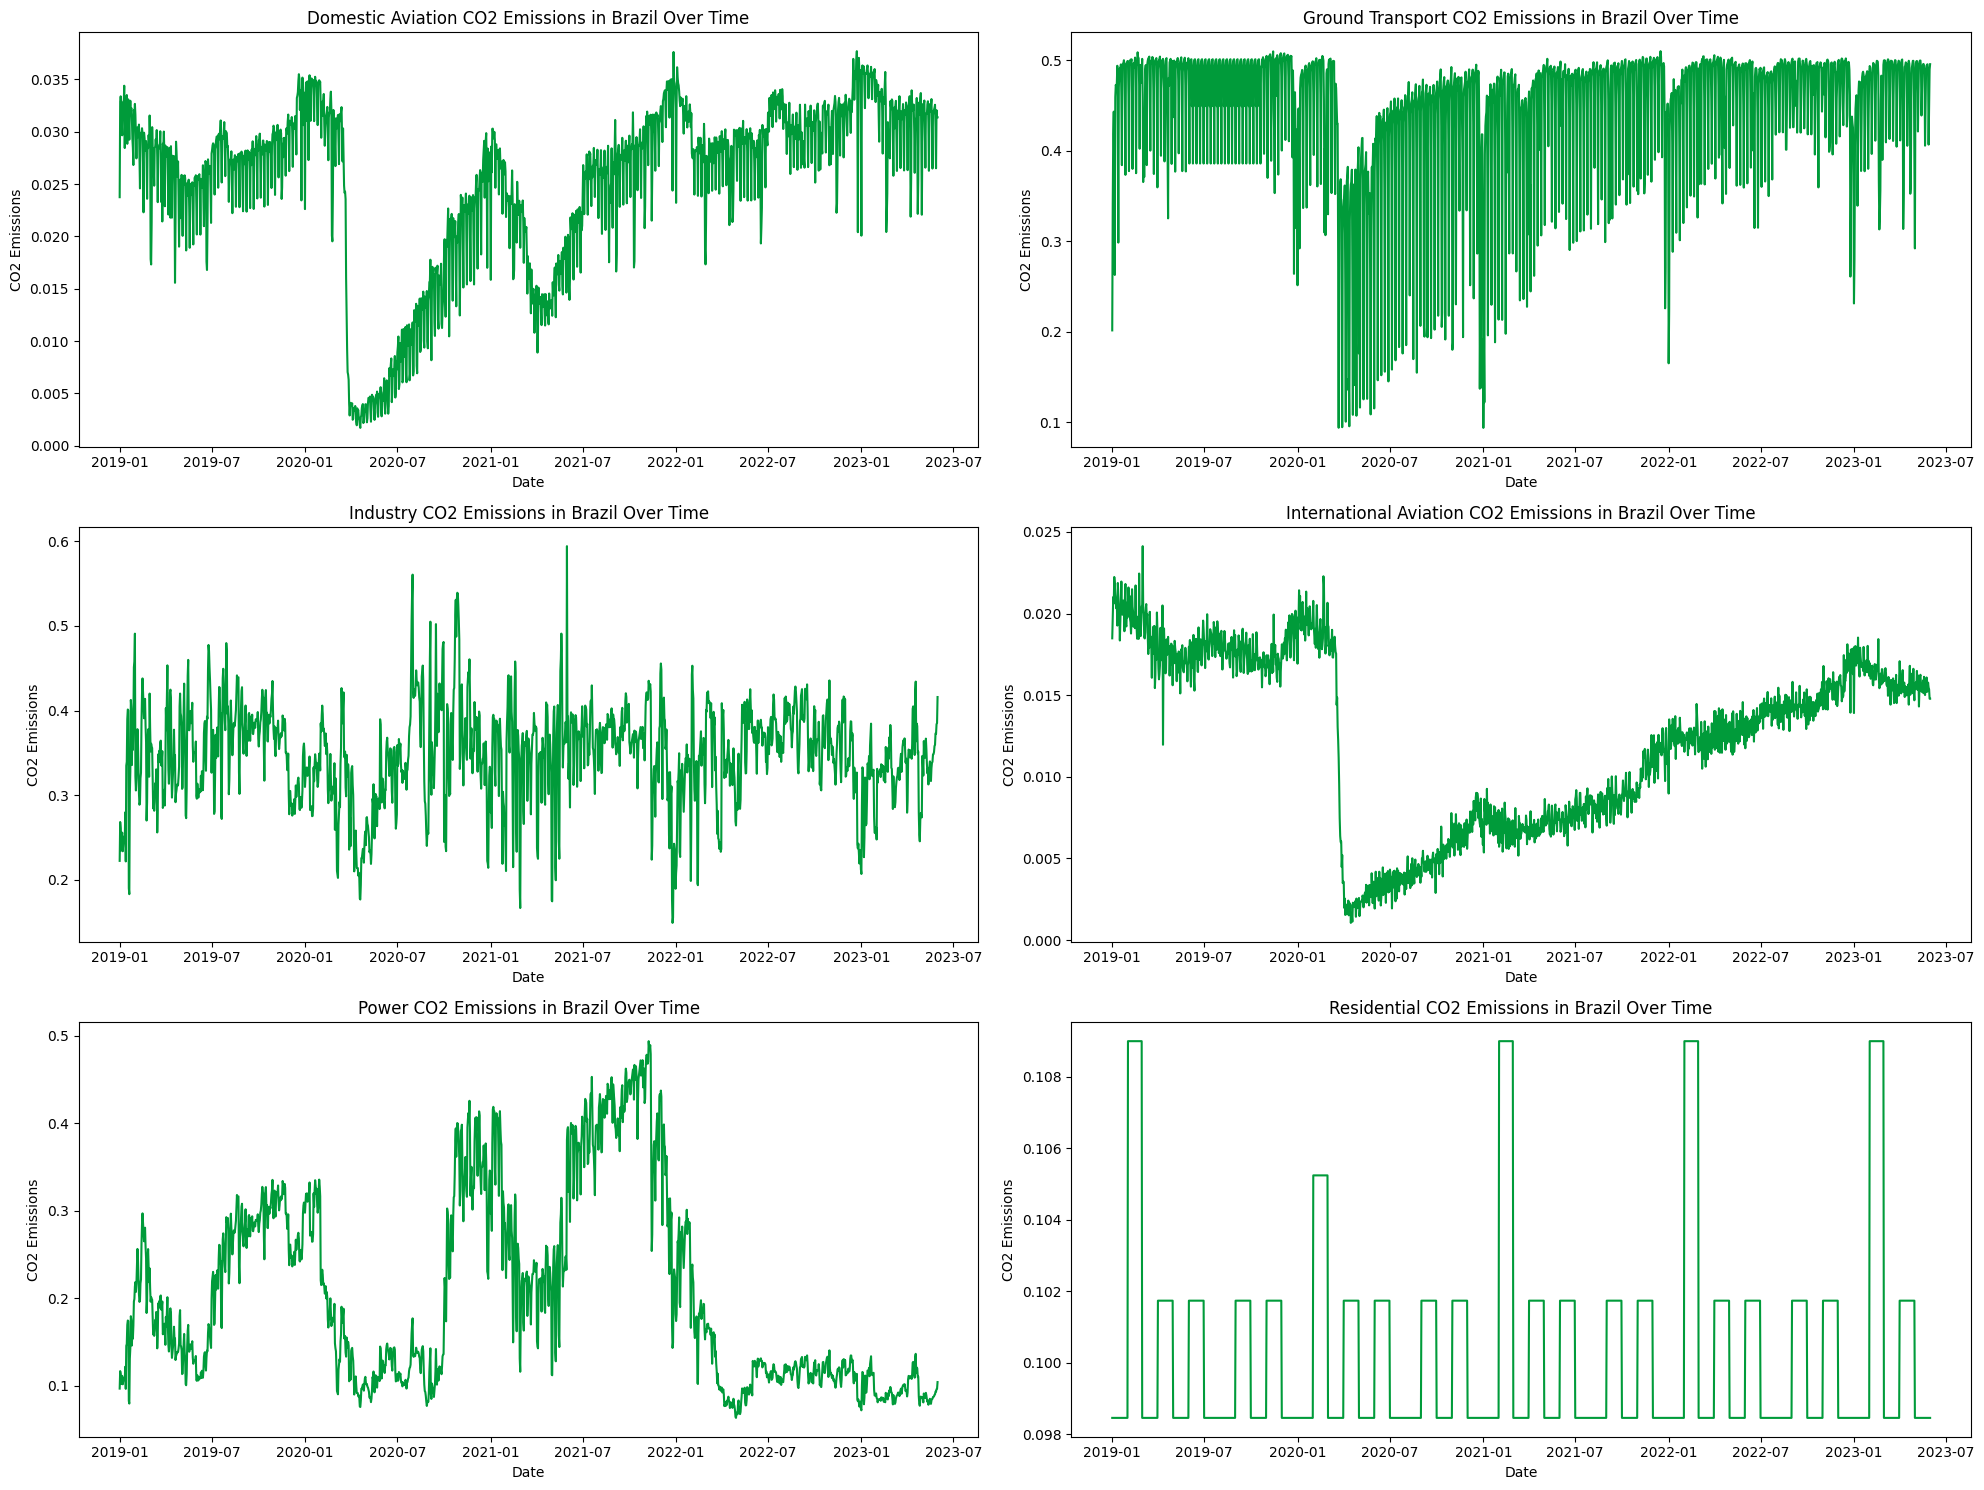

In [23]:
plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'Brazil'], x='date',y='Domestic Aviation',color='#009B3A')
plt.title('Domestic Aviation CO2 Emissions in Brazil Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,2)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'Brazil'], x='date',y='Ground Transport',color='#009B3A')
plt.title('Ground Transport CO2 Emissions in Brazil Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,3)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'Brazil'], x='date',y='Industry',color='#009B3A')
plt.title('Industry CO2 Emissions in Brazil Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,4)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'Brazil'], x='date',y='International Aviation',color='#009B3A')
plt.title('International Aviation CO2 Emissions in Brazil Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,5)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'Brazil'], x='date',y='Power',color='#009B3A')
plt.title('Power CO2 Emissions in Brazil Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,6)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'Brazil'], x='date',y='Residential',color='#009B3A')
plt.title('Residential CO2 Emissions in Brazil Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')


plt.tight_layout()
plt.show()

#### Visualize CO2 Emissions in Different Sectors for China Over Time

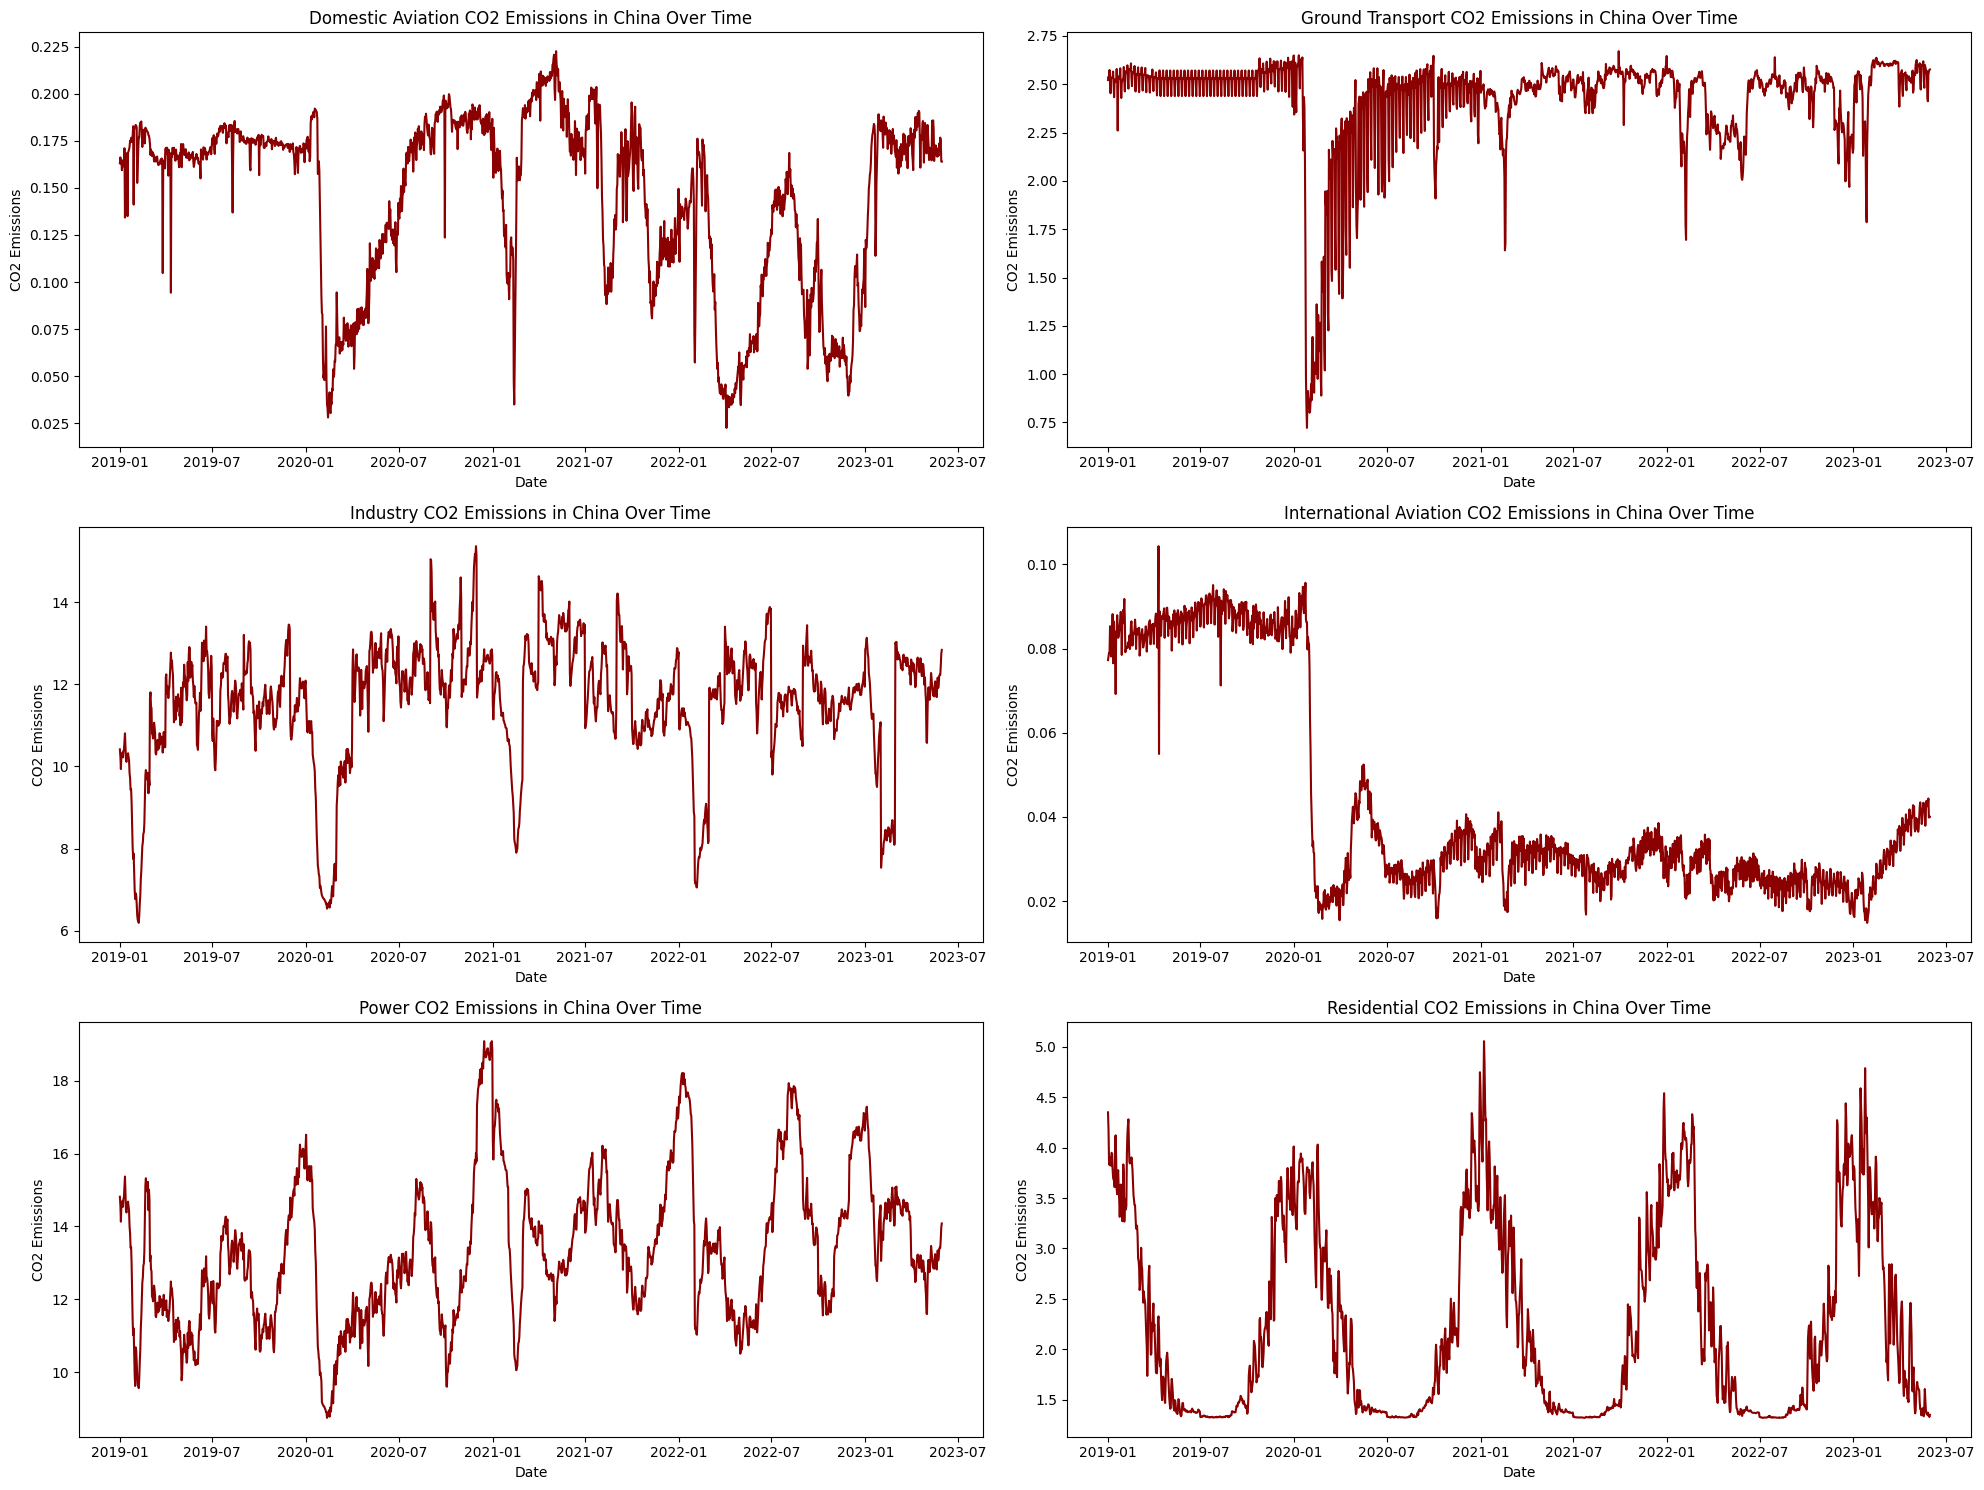

In [24]:
plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'China'], x='date',y='Domestic Aviation',color='#8B0000')
plt.title('Domestic Aviation CO2 Emissions in China Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,2)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'China'], x='date',y='Ground Transport',color='#8B0000')
plt.title('Ground Transport CO2 Emissions in China Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,3)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'China'], x='date',y='Industry',color='#8B0000')
plt.title('Industry CO2 Emissions in China Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,4)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'China'], x='date',y='International Aviation',color='#8B0000')
plt.title('International Aviation CO2 Emissions in China Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,5)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'China'], x='date',y='Power',color='#8B0000')
plt.title('Power CO2 Emissions in China Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,6)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'China'], x='date',y='Residential',color='#8B0000')
plt.title('Residential CO2 Emissions in China Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')


plt.tight_layout()
plt.show()

#### Visualize CO2 Emissions in Different Sectors for France Over Time

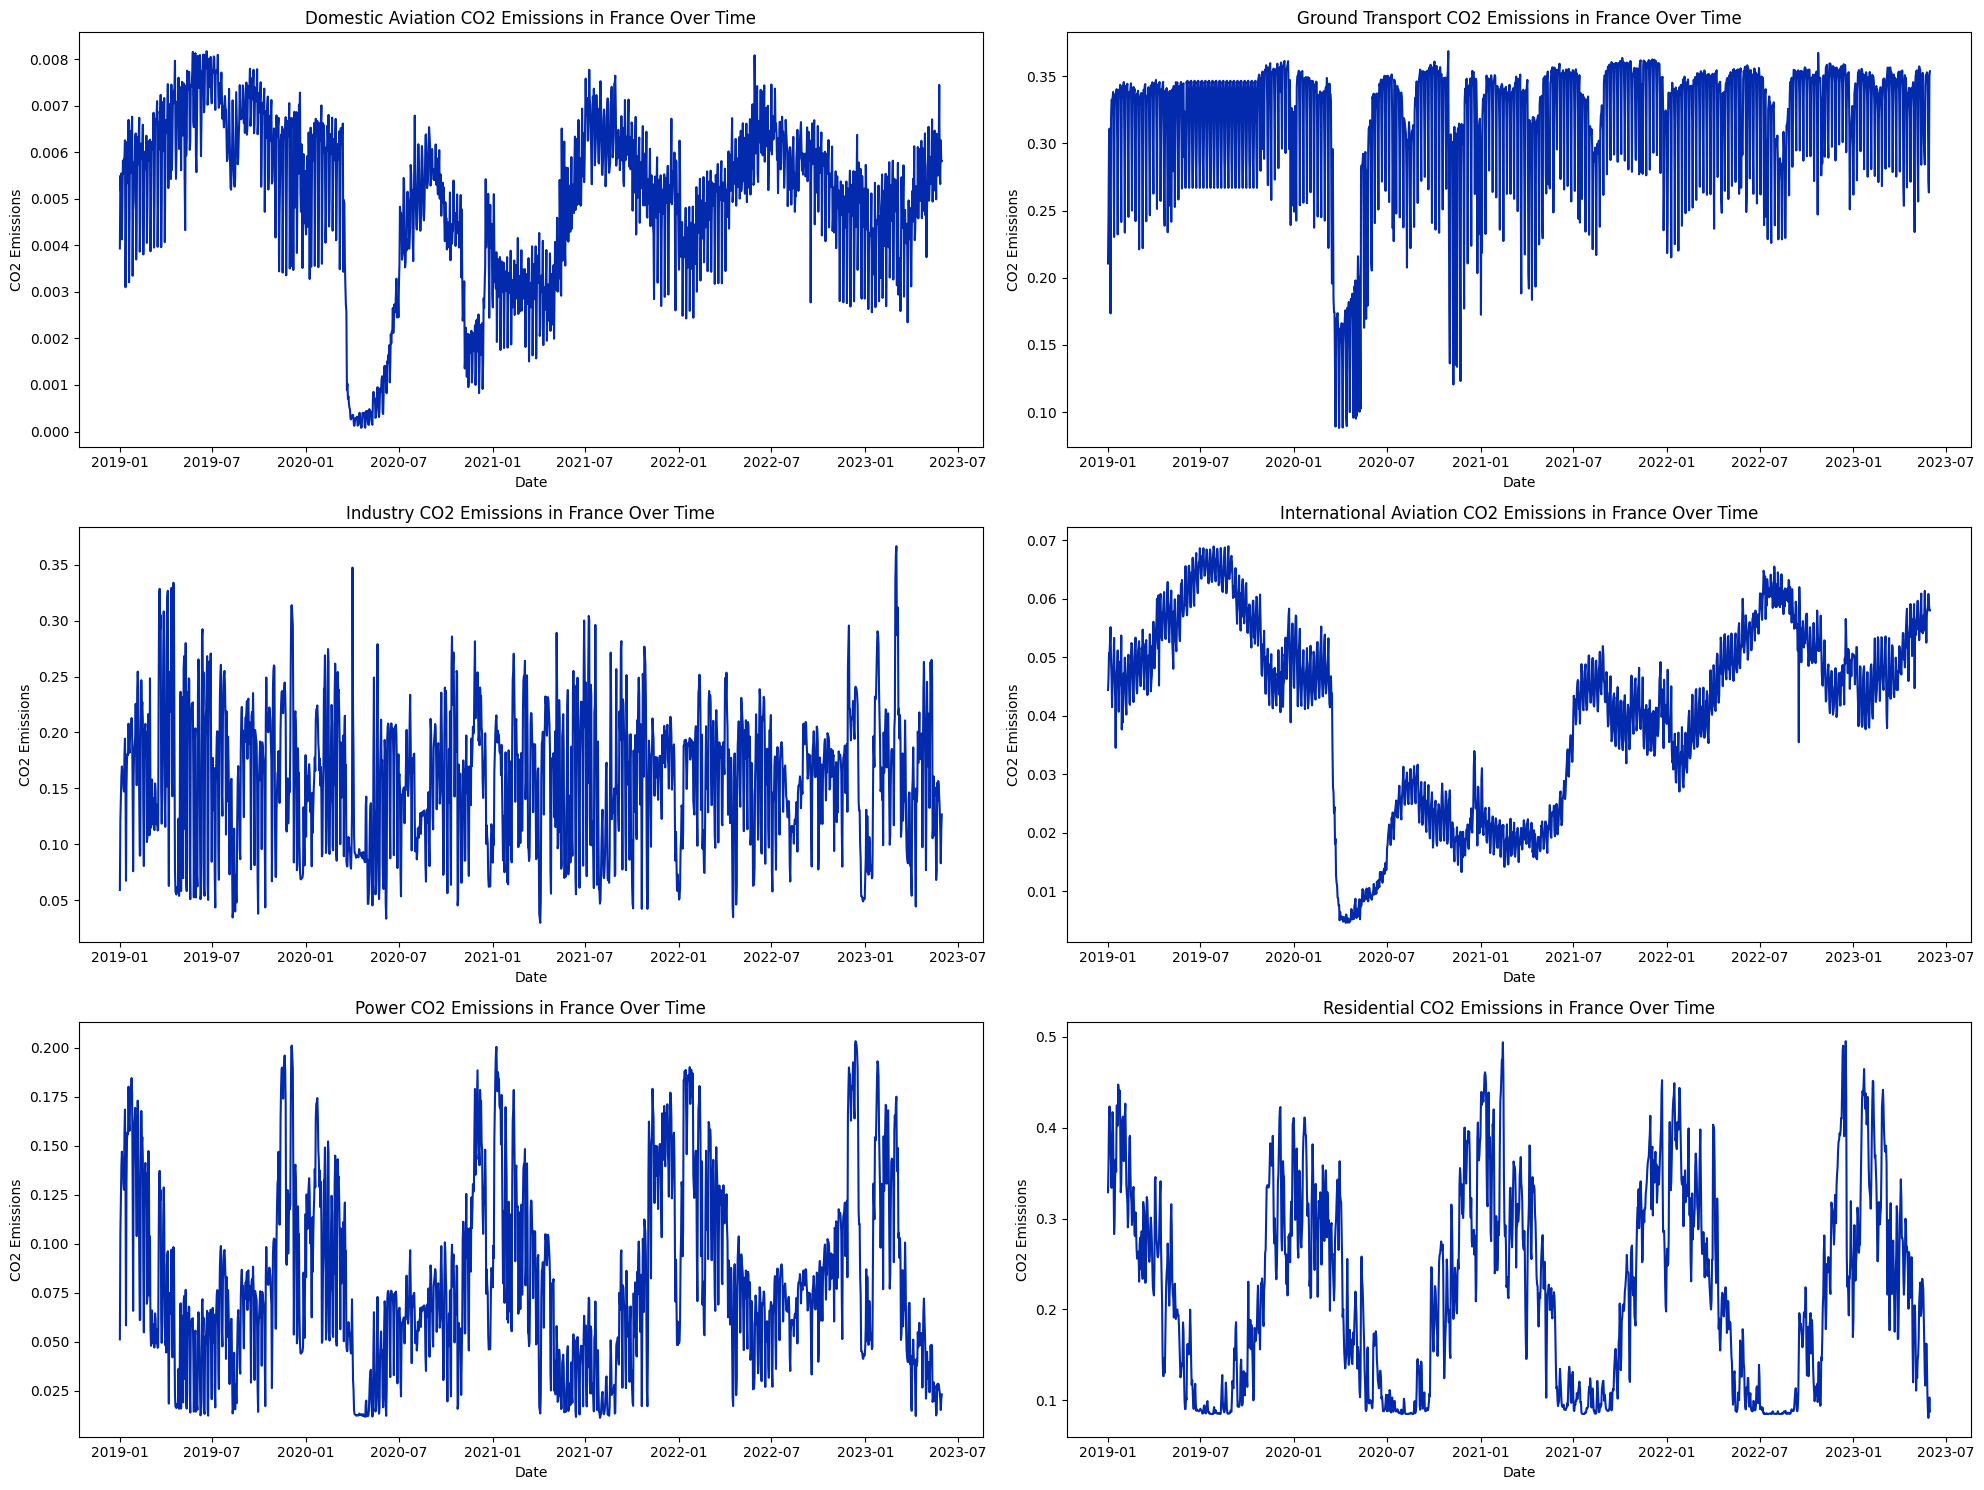

In [25]:
plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'France'], x='date',y='Domestic Aviation',color='#032AAC')
plt.title('Domestic Aviation CO2 Emissions in France Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,2)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'France'], x='date',y='Ground Transport',color='#032AAC')
plt.title('Ground Transport CO2 Emissions in France Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,3)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'France'], x='date',y='Industry',color='#032AAC')
plt.title('Industry CO2 Emissions in France Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,4)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'France'], x='date',y='International Aviation',color='#032AAC')
plt.title('International Aviation CO2 Emissions in France Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,5)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'France'], x='date',y='Power',color='#032AAC')
plt.title('Power CO2 Emissions in France Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,6)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'France'], x='date',y='Residential',color='#032AAC')
plt.title('Residential CO2 Emissions in France Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')


plt.tight_layout()
plt.show()

#### Visualize CO2 Emissions in Different Sectors for Germany Over Time

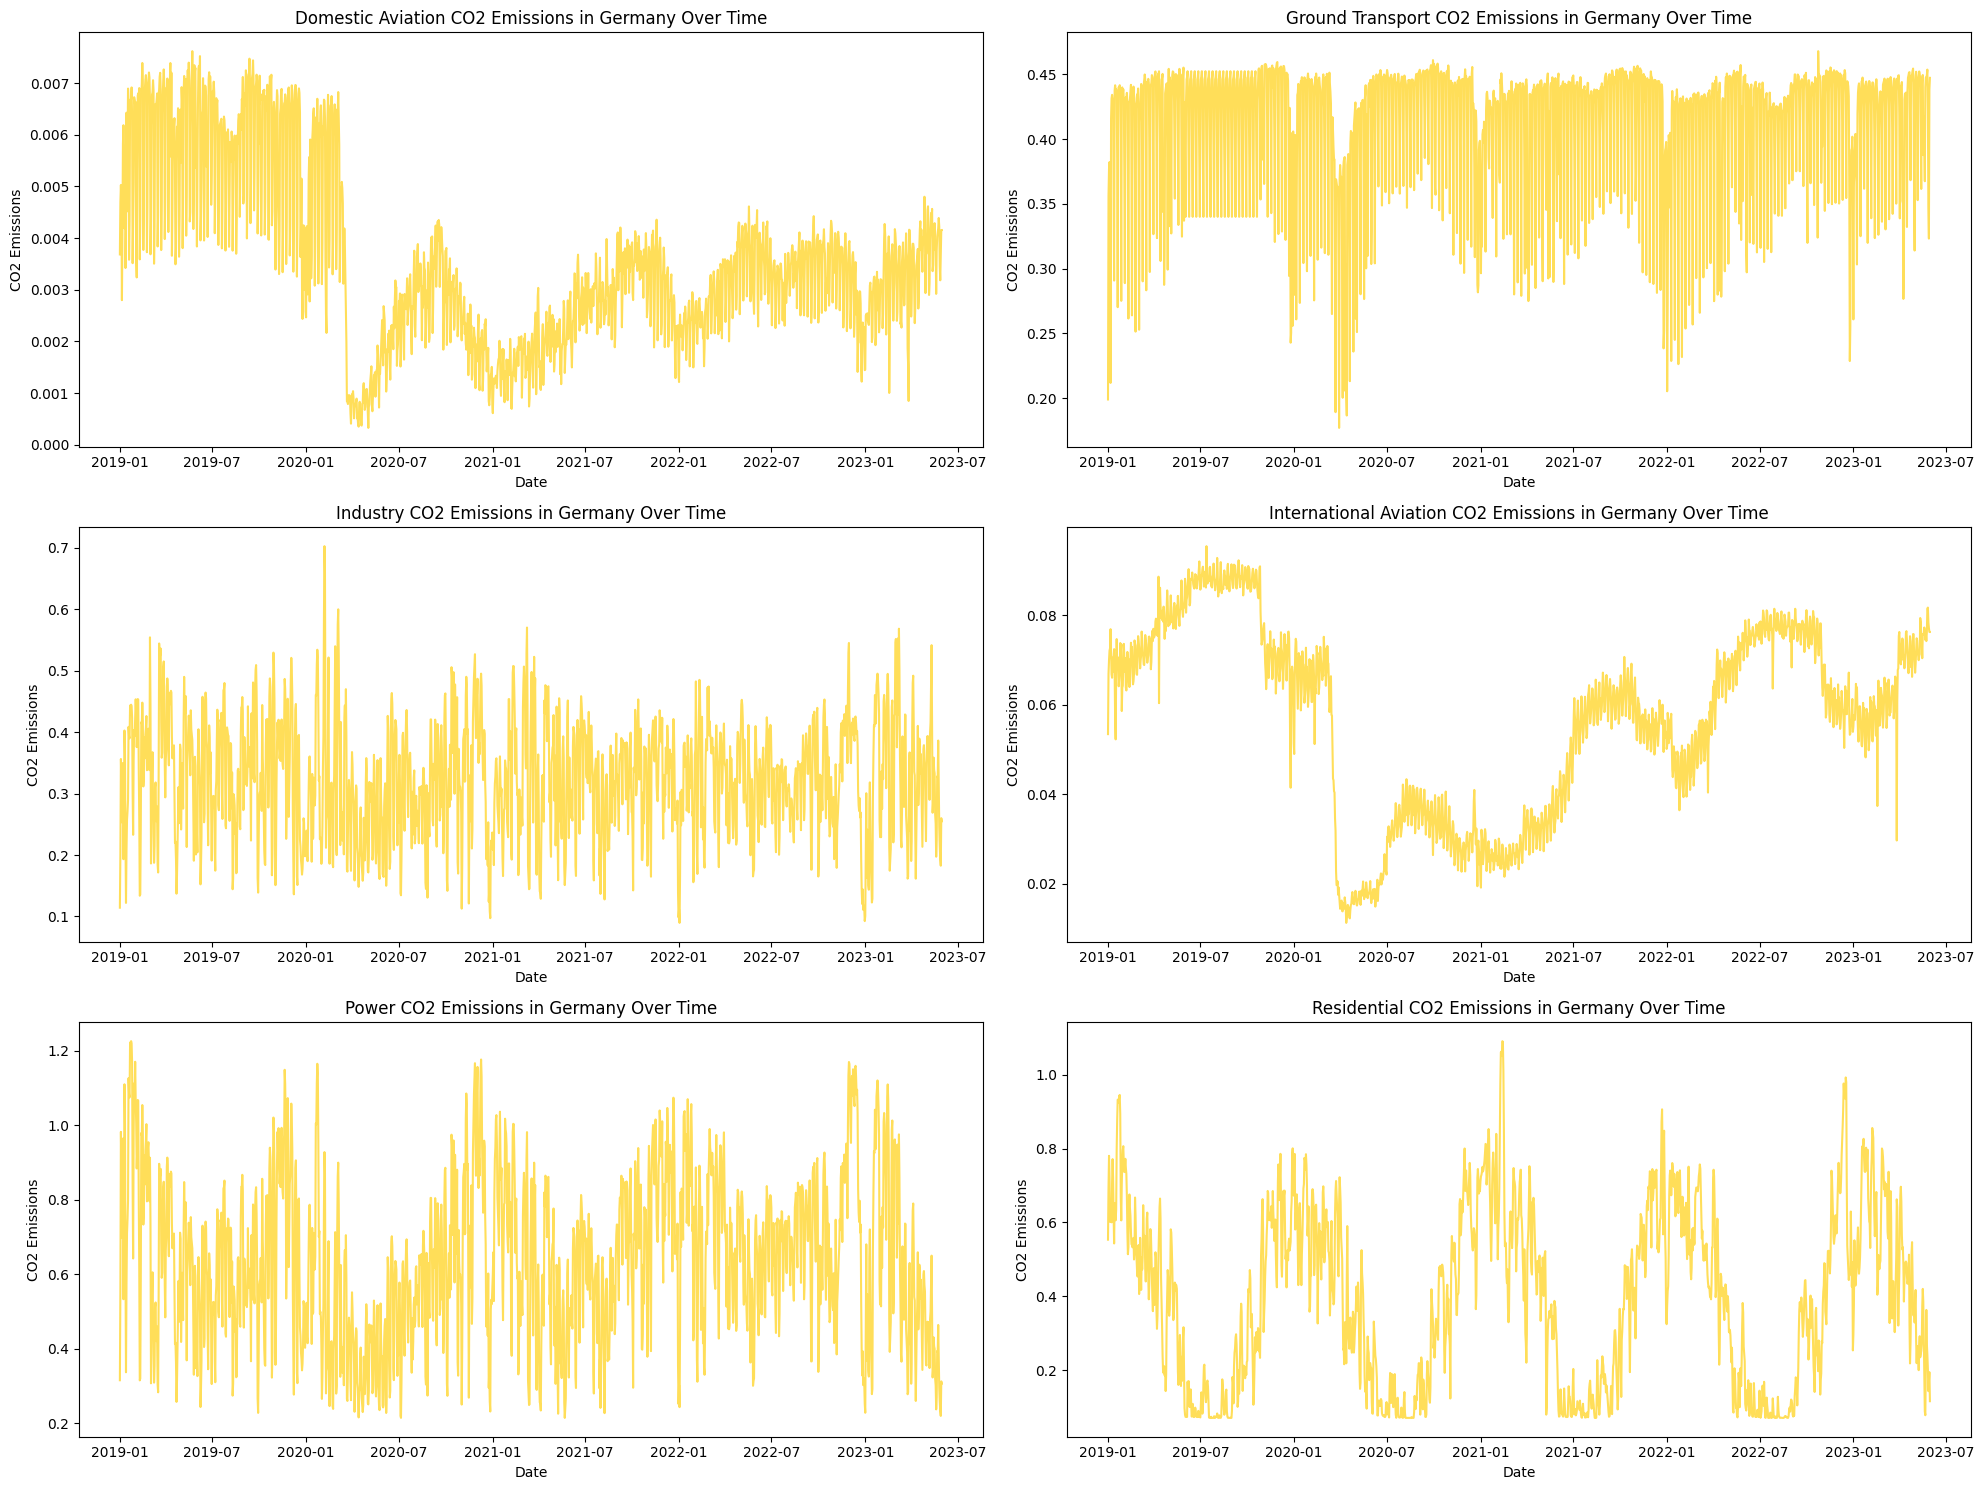

In [26]:
plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'Germany'], x='date',y='Domestic Aviation',color='#FFDE59')
plt.title('Domestic Aviation CO2 Emissions in Germany Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,2)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'Germany'], x='date',y='Ground Transport',color='#FFDE59')
plt.title('Ground Transport CO2 Emissions in Germany Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,3)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'Germany'], x='date',y='Industry',color='#FFDE59')
plt.title('Industry CO2 Emissions in Germany Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,4)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'Germany'], x='date',y='International Aviation',color='#FFDE59')
plt.title('International Aviation CO2 Emissions in Germany Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,5)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'Germany'], x='date',y='Power',color='#FFDE59')
plt.title('Power CO2 Emissions in Germany Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,6)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'Germany'], x='date',y='Residential',color='#FFDE59')
plt.title('Residential CO2 Emissions in Germany Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')


plt.tight_layout()
plt.show()

#### Visualize CO2 Emissions in Different Sectors for India Over Time

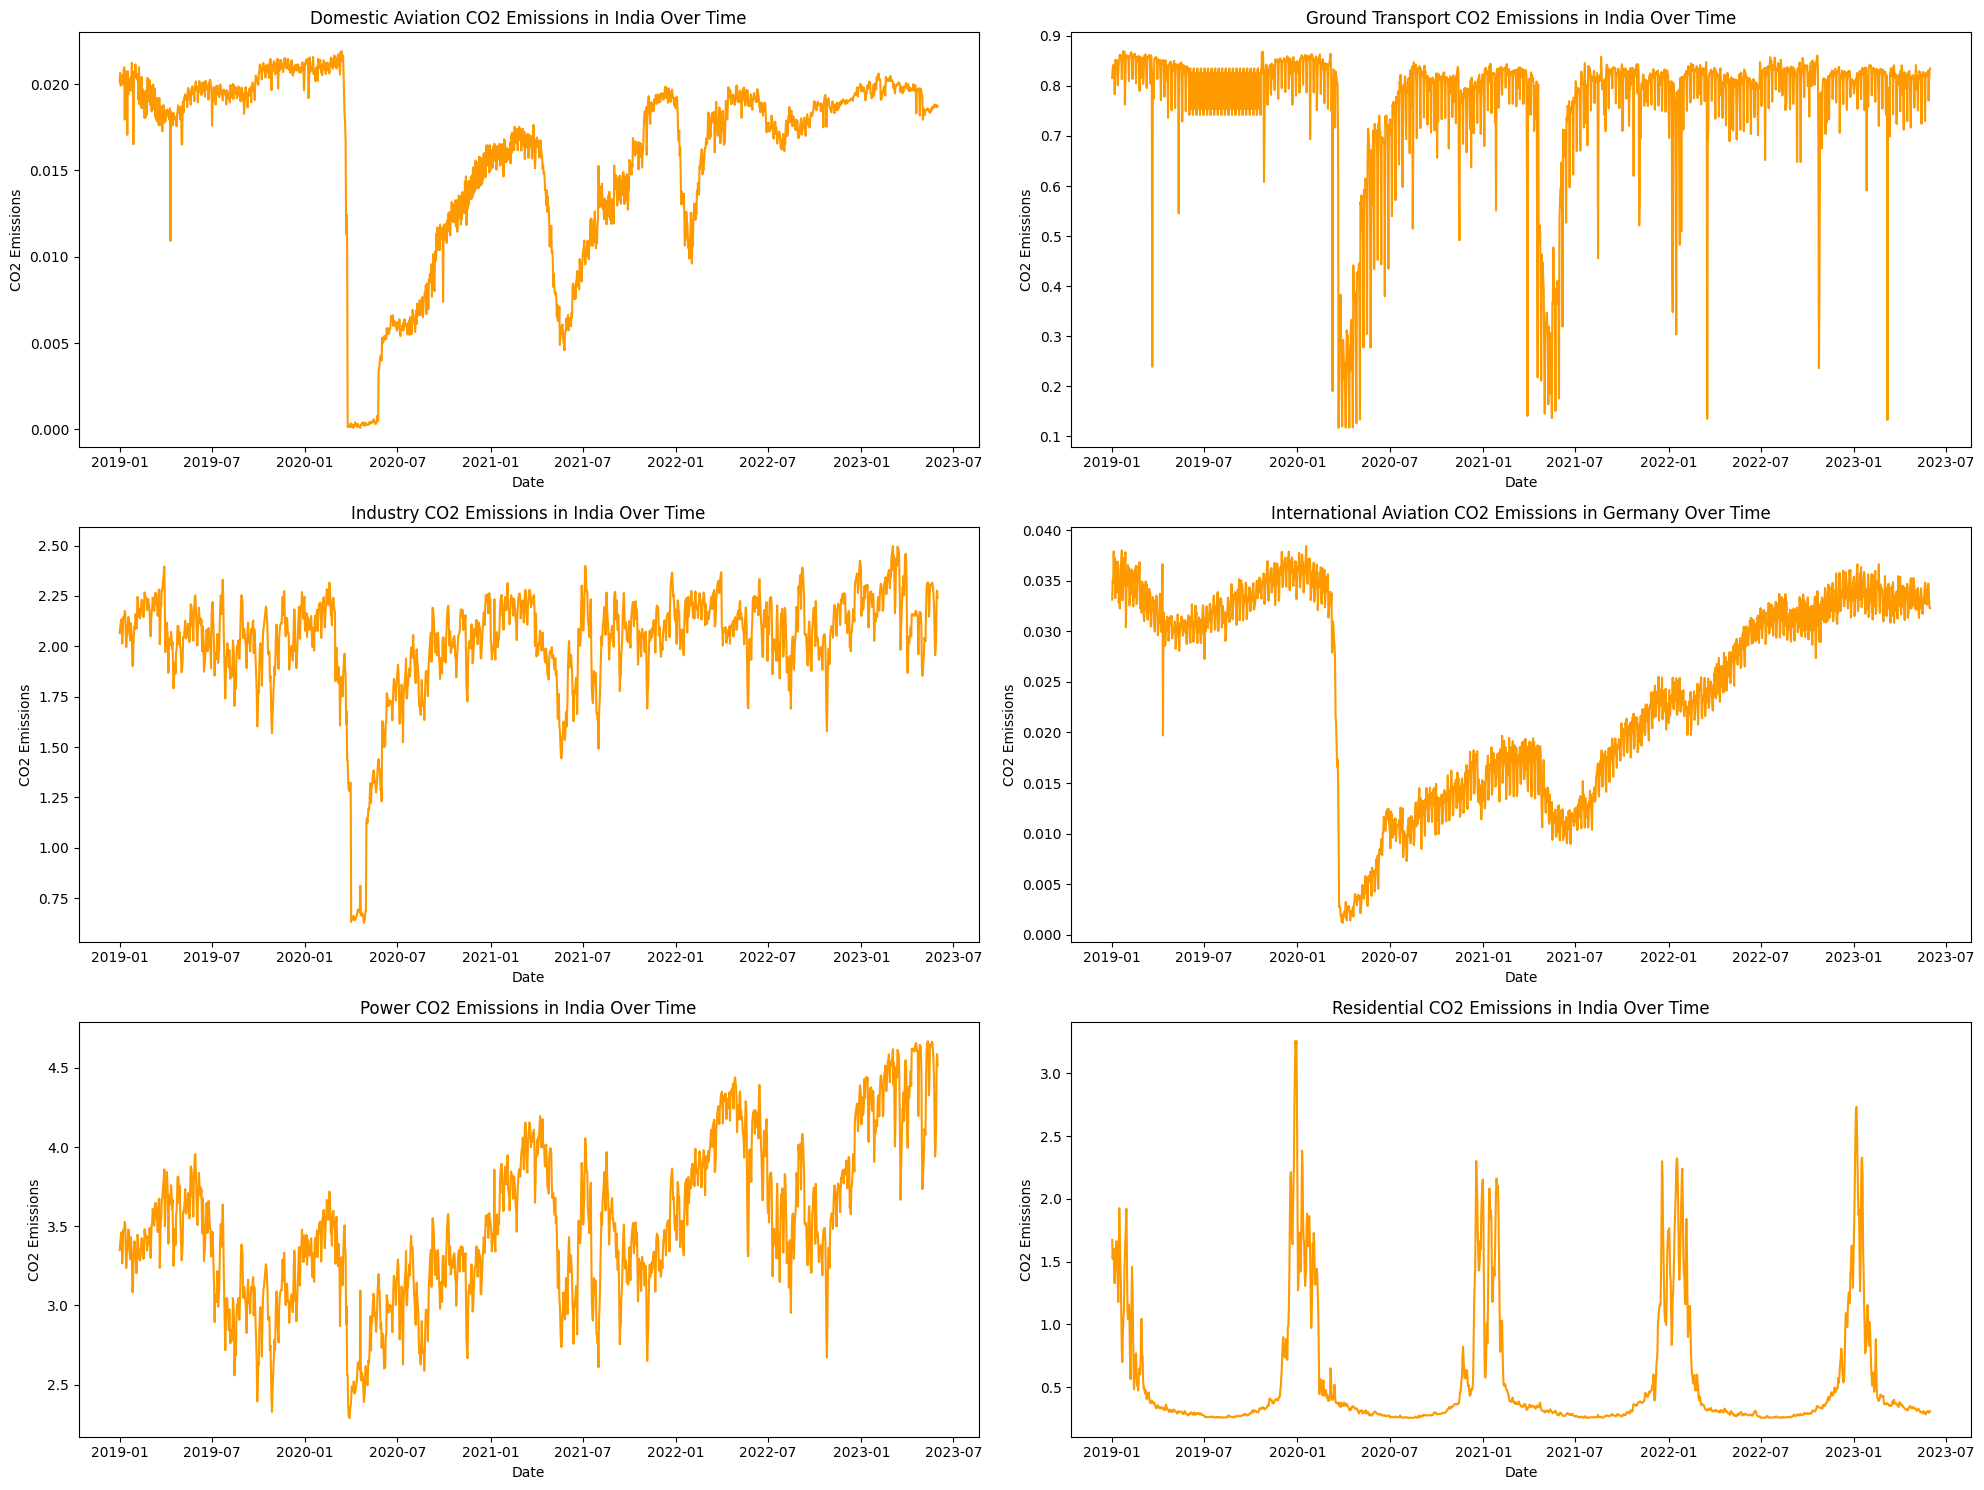

In [27]:
plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'India'], x='date',y='Domestic Aviation',color='#FE9900')
plt.title('Domestic Aviation CO2 Emissions in India Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,2)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'India'], x='date',y='Ground Transport',color='#FE9900')
plt.title('Ground Transport CO2 Emissions in India Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,3)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'India'], x='date',y='Industry',color='#FE9900')
plt.title('Industry CO2 Emissions in India Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,4)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'India'], x='date',y='International Aviation',color='#FE9900')
plt.title('International Aviation CO2 Emissions in Germany Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,5)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'India'], x='date',y='Power',color='#FE9900')
plt.title('Power CO2 Emissions in India Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,6)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'India'], x='date',y='Residential',color='#FE9900')
plt.title('Residential CO2 Emissions in India Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')


plt.tight_layout()
plt.show()

#### Visualize CO2 Emissions in Different Sectors for Italy Over Time

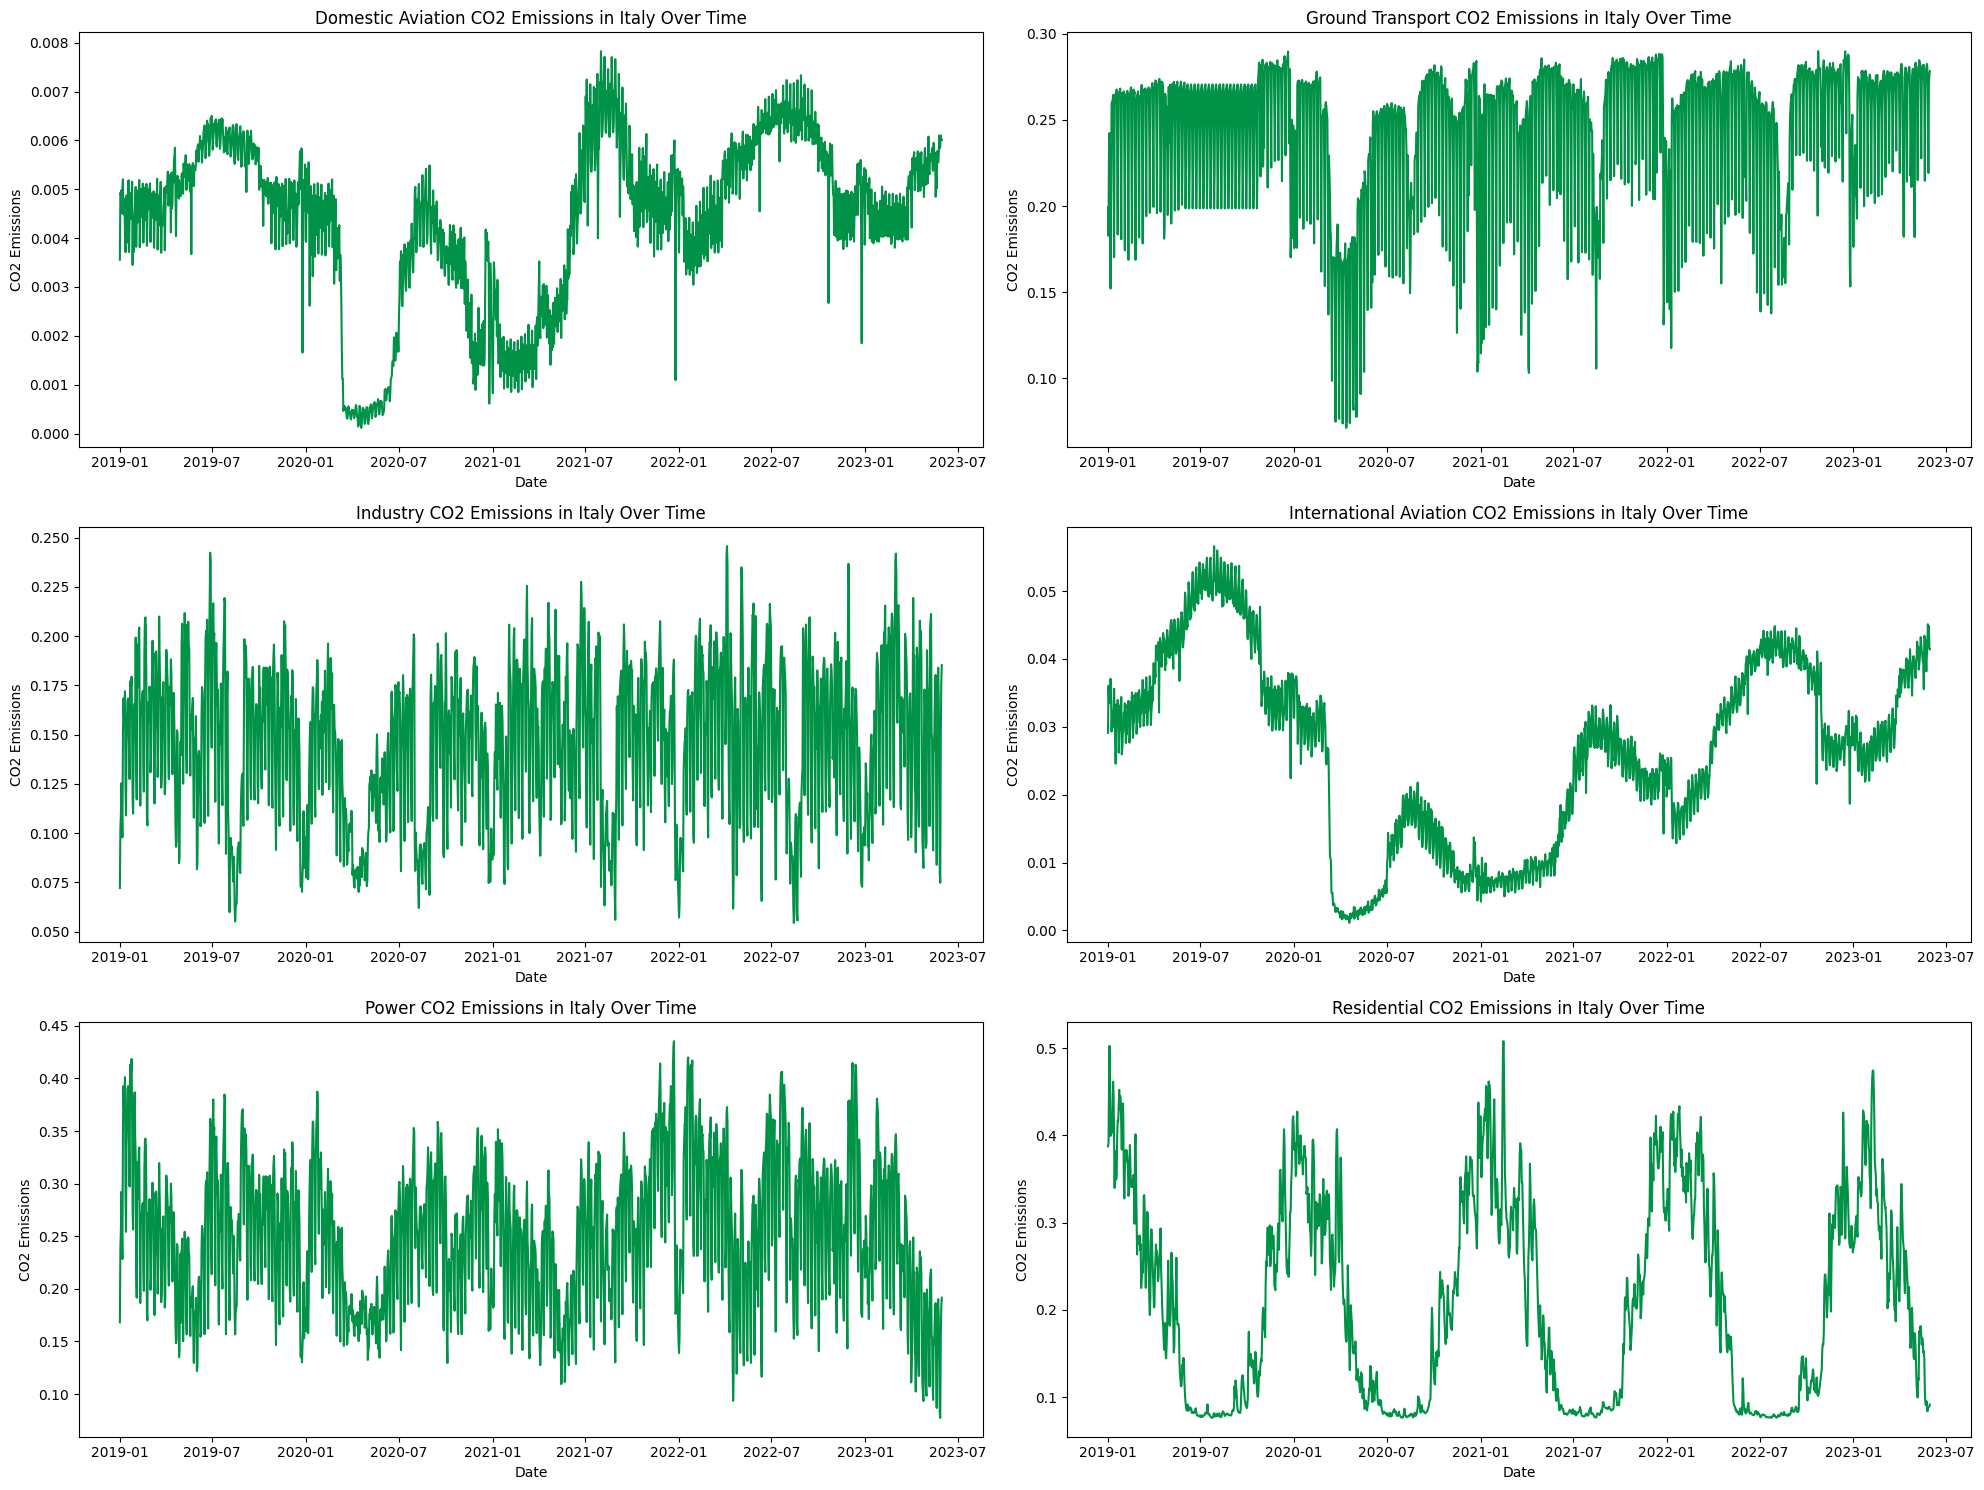

In [28]:
plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'Italy'], x='date',y='Domestic Aviation',color='#009246')
plt.title('Domestic Aviation CO2 Emissions in Italy Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,2)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'Italy'], x='date',y='Ground Transport',color='#009246')
plt.title('Ground Transport CO2 Emissions in Italy Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,3)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'Italy'], x='date',y='Industry',color='#009246')
plt.title('Industry CO2 Emissions in Italy Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,4)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'Italy'], x='date',y='International Aviation',color='#009246')
plt.title('International Aviation CO2 Emissions in Italy Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,5)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'Italy'], x='date',y='Power',color='#009246')
plt.title('Power CO2 Emissions in Italy Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,6)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'Italy'], x='date',y='Residential',color='#009246')
plt.title('Residential CO2 Emissions in Italy Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')


plt.tight_layout()
plt.show()

#### Visualize CO2 Emissions in Different Sectors for Japan Over Time

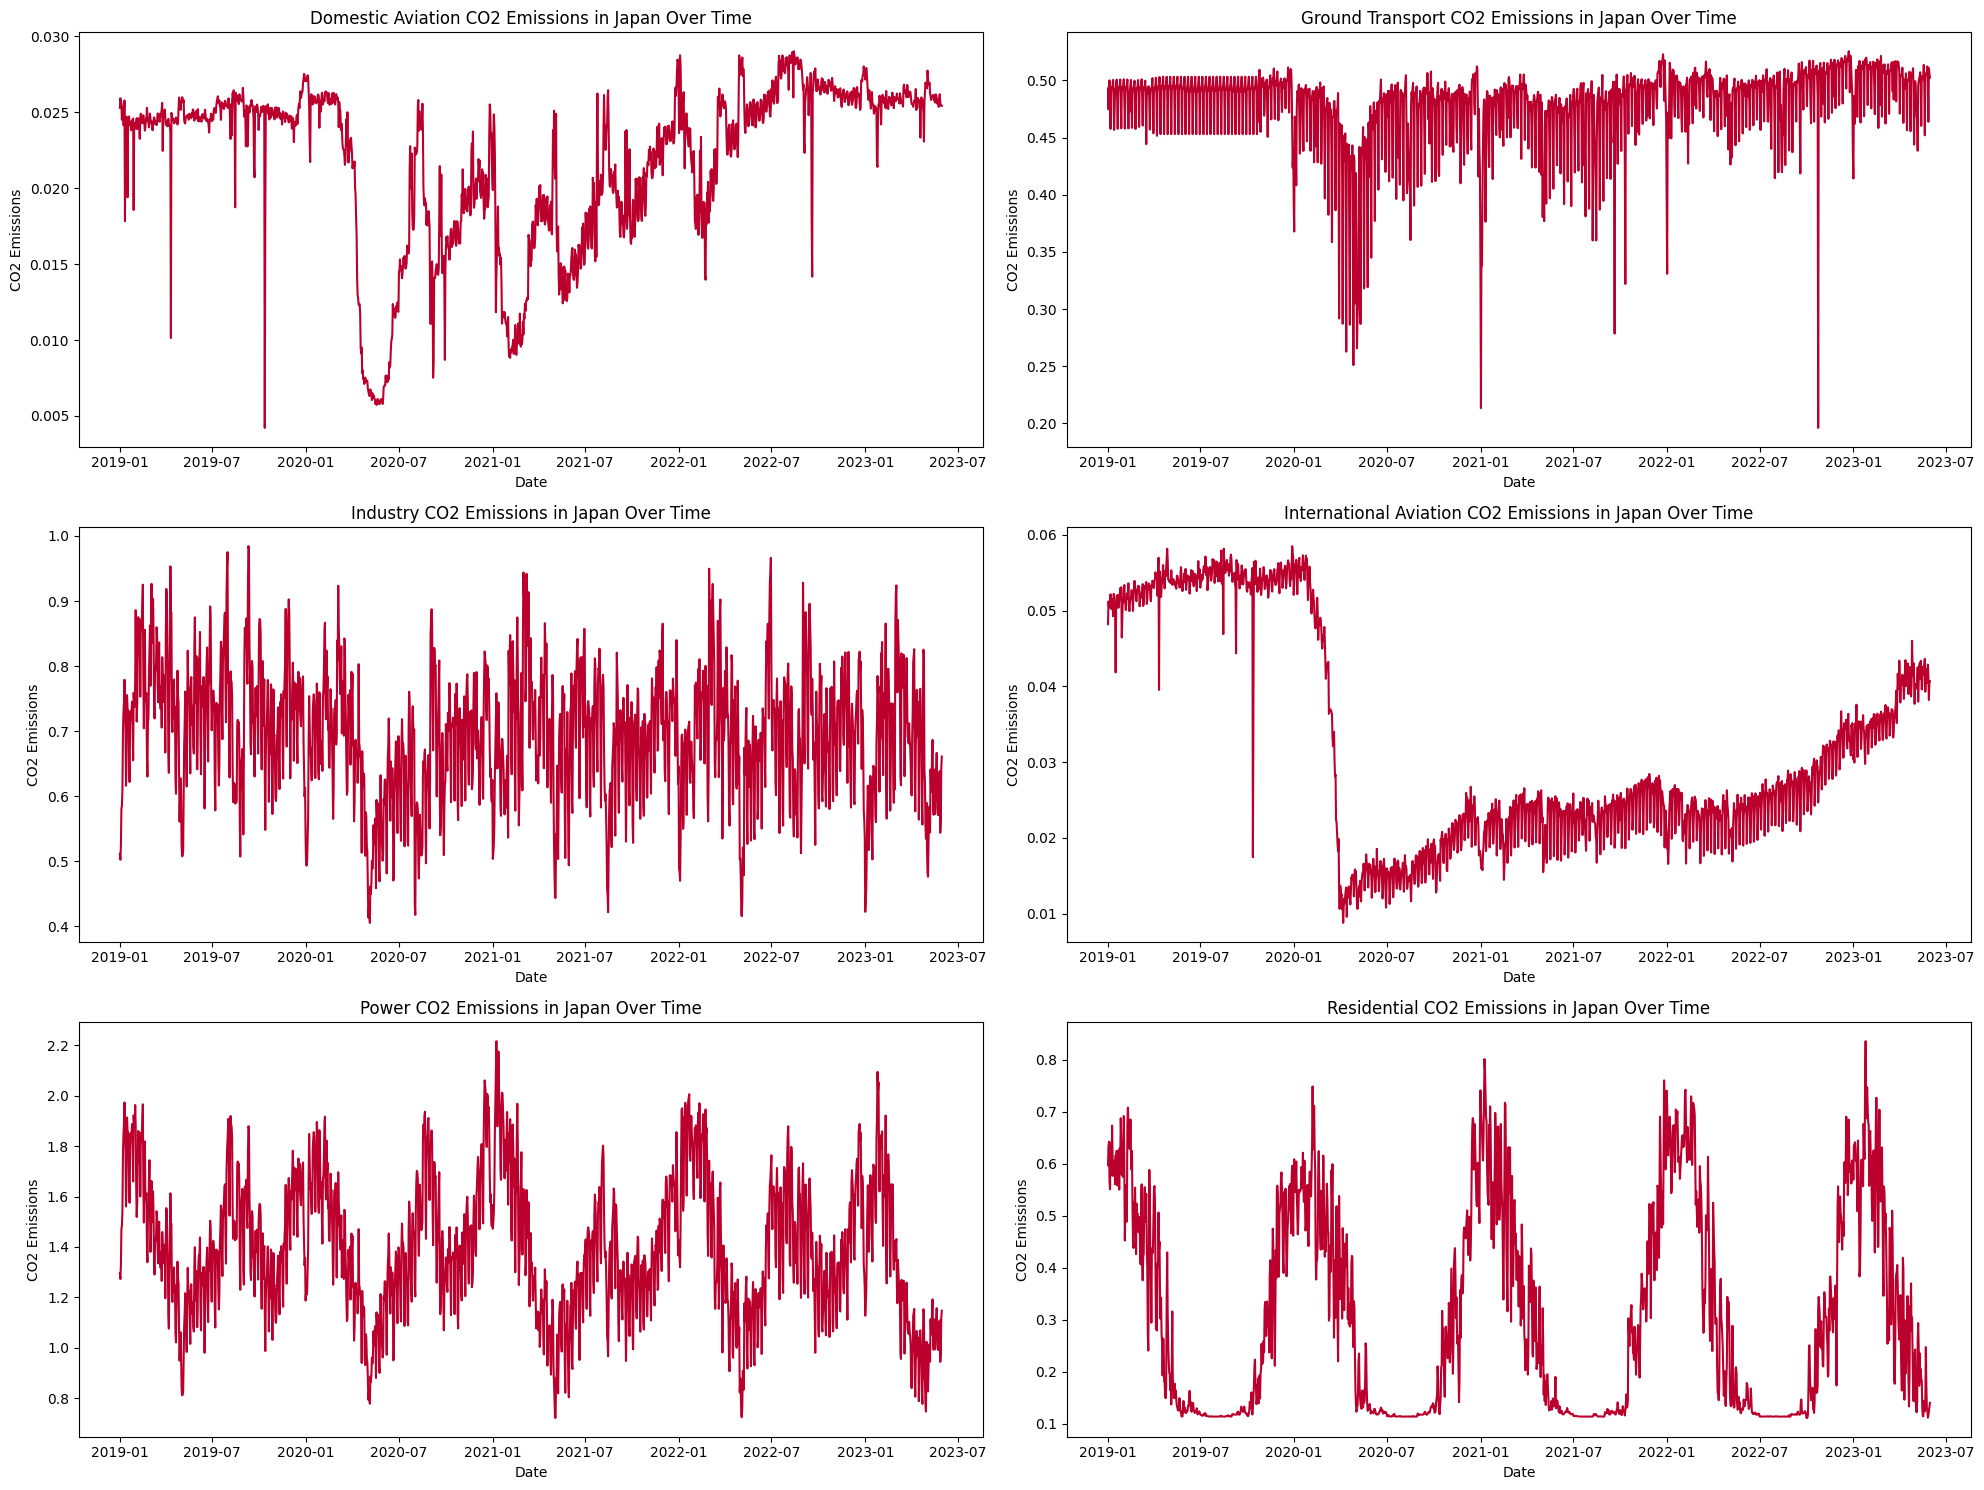

In [29]:
plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'Japan'], x='date',y='Domestic Aviation',color='#BC002D')
plt.title('Domestic Aviation CO2 Emissions in Japan Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,2)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'Japan'], x='date',y='Ground Transport',color='#BC002D')
plt.title('Ground Transport CO2 Emissions in Japan Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,3)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'Japan'], x='date',y='Industry',color='#BC002D')
plt.title('Industry CO2 Emissions in Japan Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,4)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'Japan'], x='date',y='International Aviation',color='#BC002D')
plt.title('International Aviation CO2 Emissions in Japan Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,5)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'Japan'], x='date',y='Power',color='#BC002D')
plt.title('Power CO2 Emissions in Japan Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,6)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'Japan'], x='date',y='Residential',color='#BC002D')
plt.title('Residential CO2 Emissions in Japan Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')


plt.tight_layout()
plt.show()

#### Visualize CO2 Emissions in Different Sectors for Russia Over Time

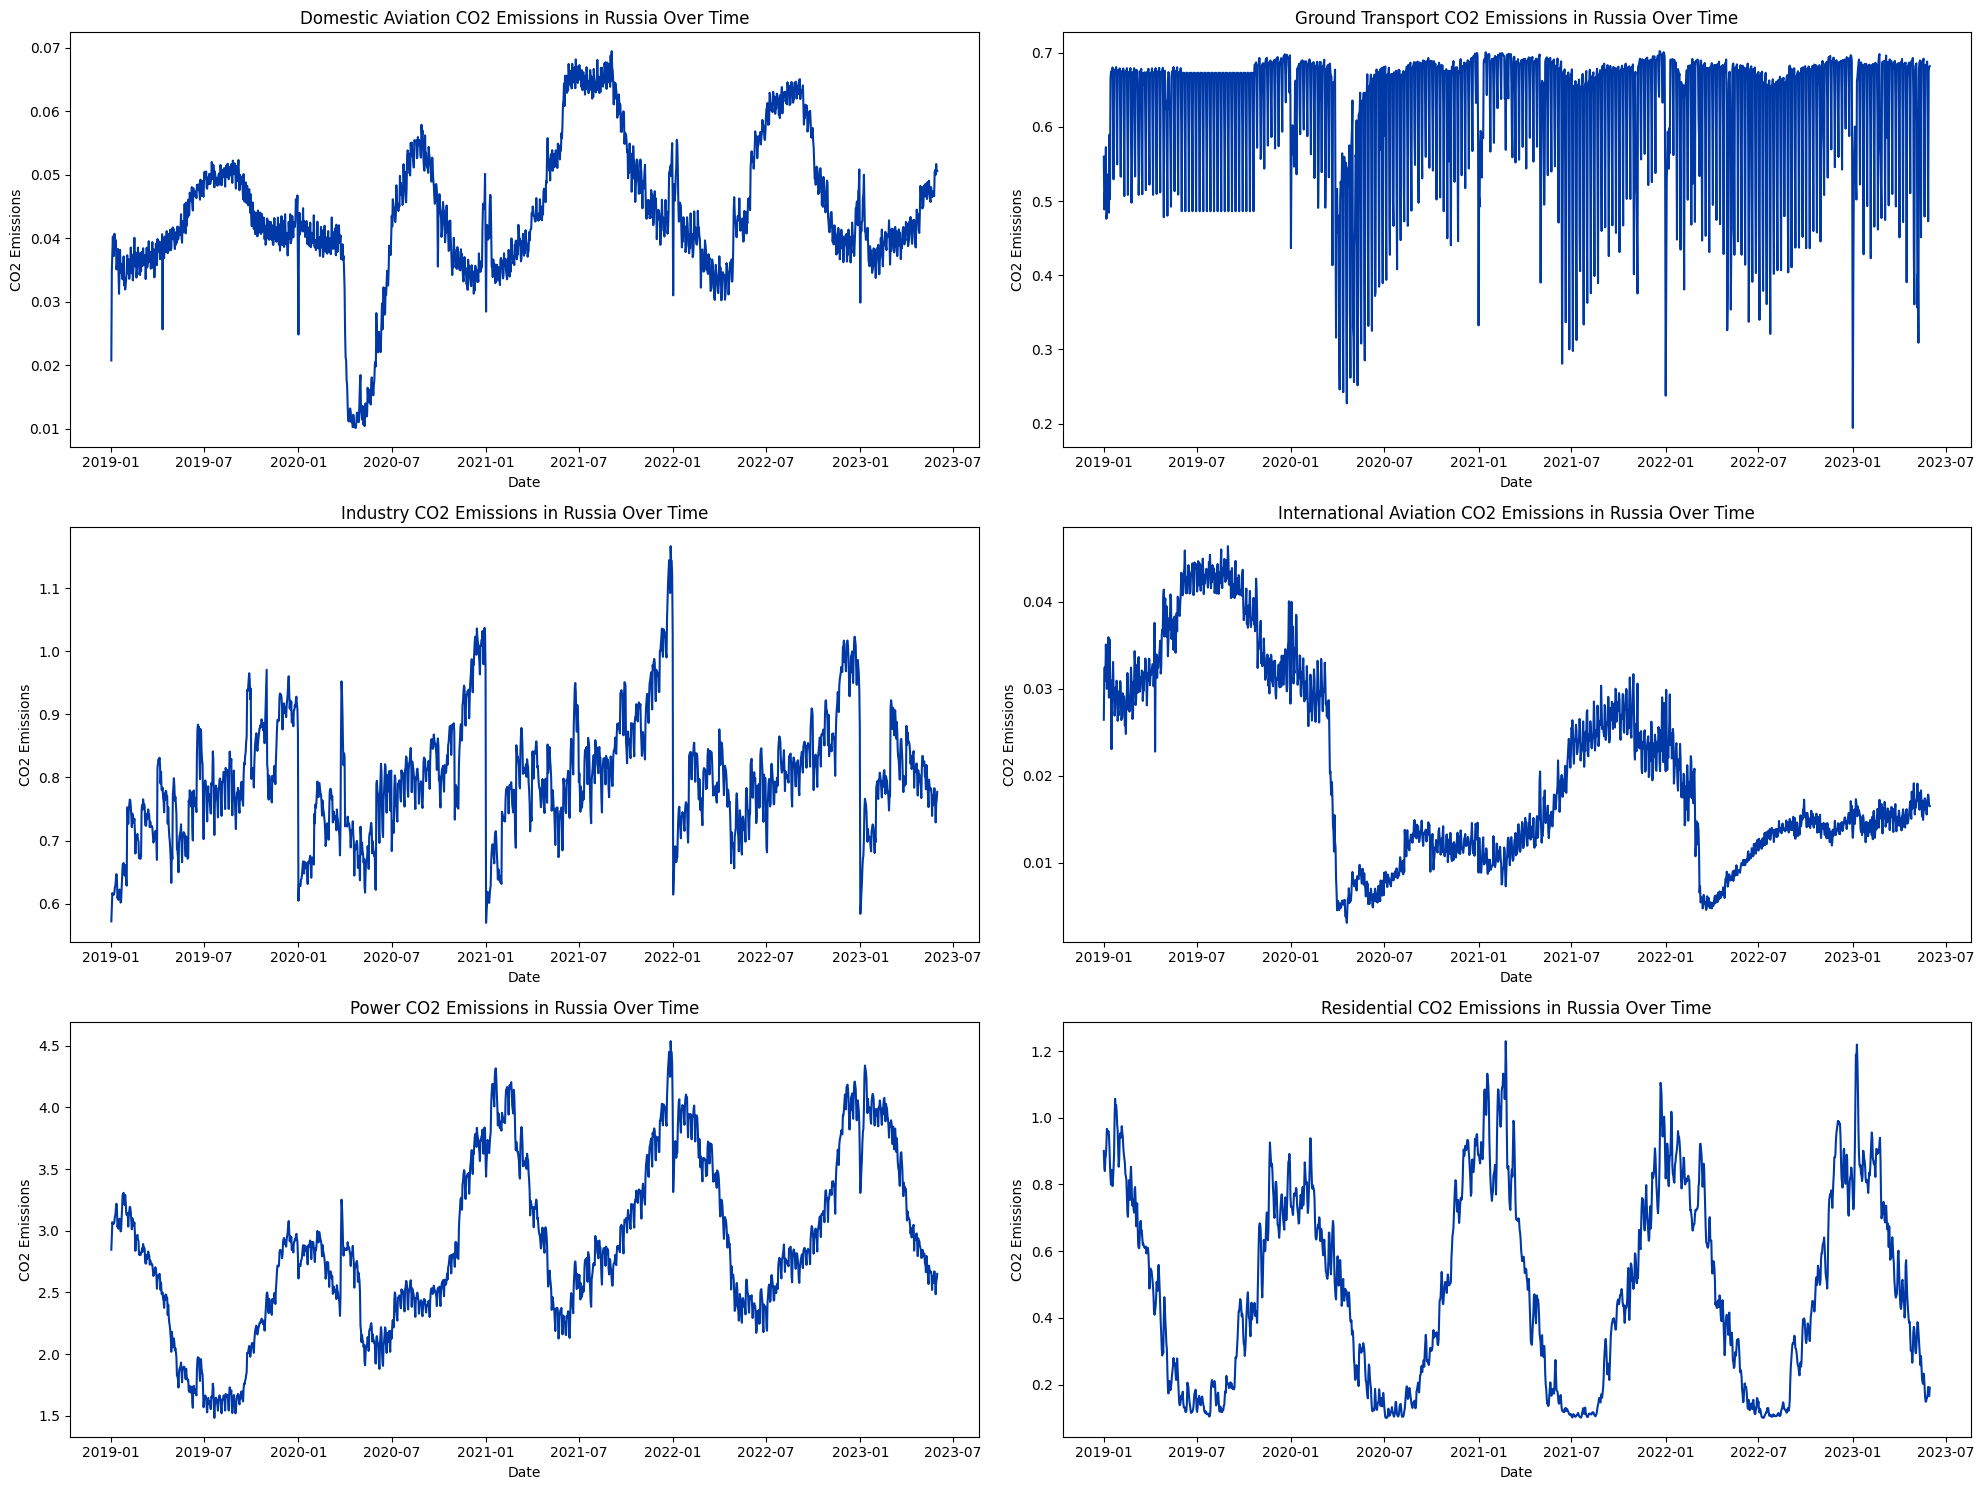

In [30]:
plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'Russia'], x='date',y='Domestic Aviation',color='#0039A6')
plt.title('Domestic Aviation CO2 Emissions in Russia Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,2)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'Russia'], x='date',y='Ground Transport',color='#0039A6')
plt.title('Ground Transport CO2 Emissions in Russia Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,3)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'Russia'], x='date',y='Industry',color='#0039A6')
plt.title('Industry CO2 Emissions in Russia Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,4)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'Russia'], x='date',y='International Aviation',color='#0039A6')
plt.title('International Aviation CO2 Emissions in Russia Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,5)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'Russia'], x='date',y='Power',color='#0039A6')
plt.title('Power CO2 Emissions in Russia Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,6)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'Russia'], x='date',y='Residential',color='#0039A6')
plt.title('Residential CO2 Emissions in Russia Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')


plt.tight_layout()
plt.show()

#### Visualize CO2 Emissions in Different Sectors for Spain Over Time

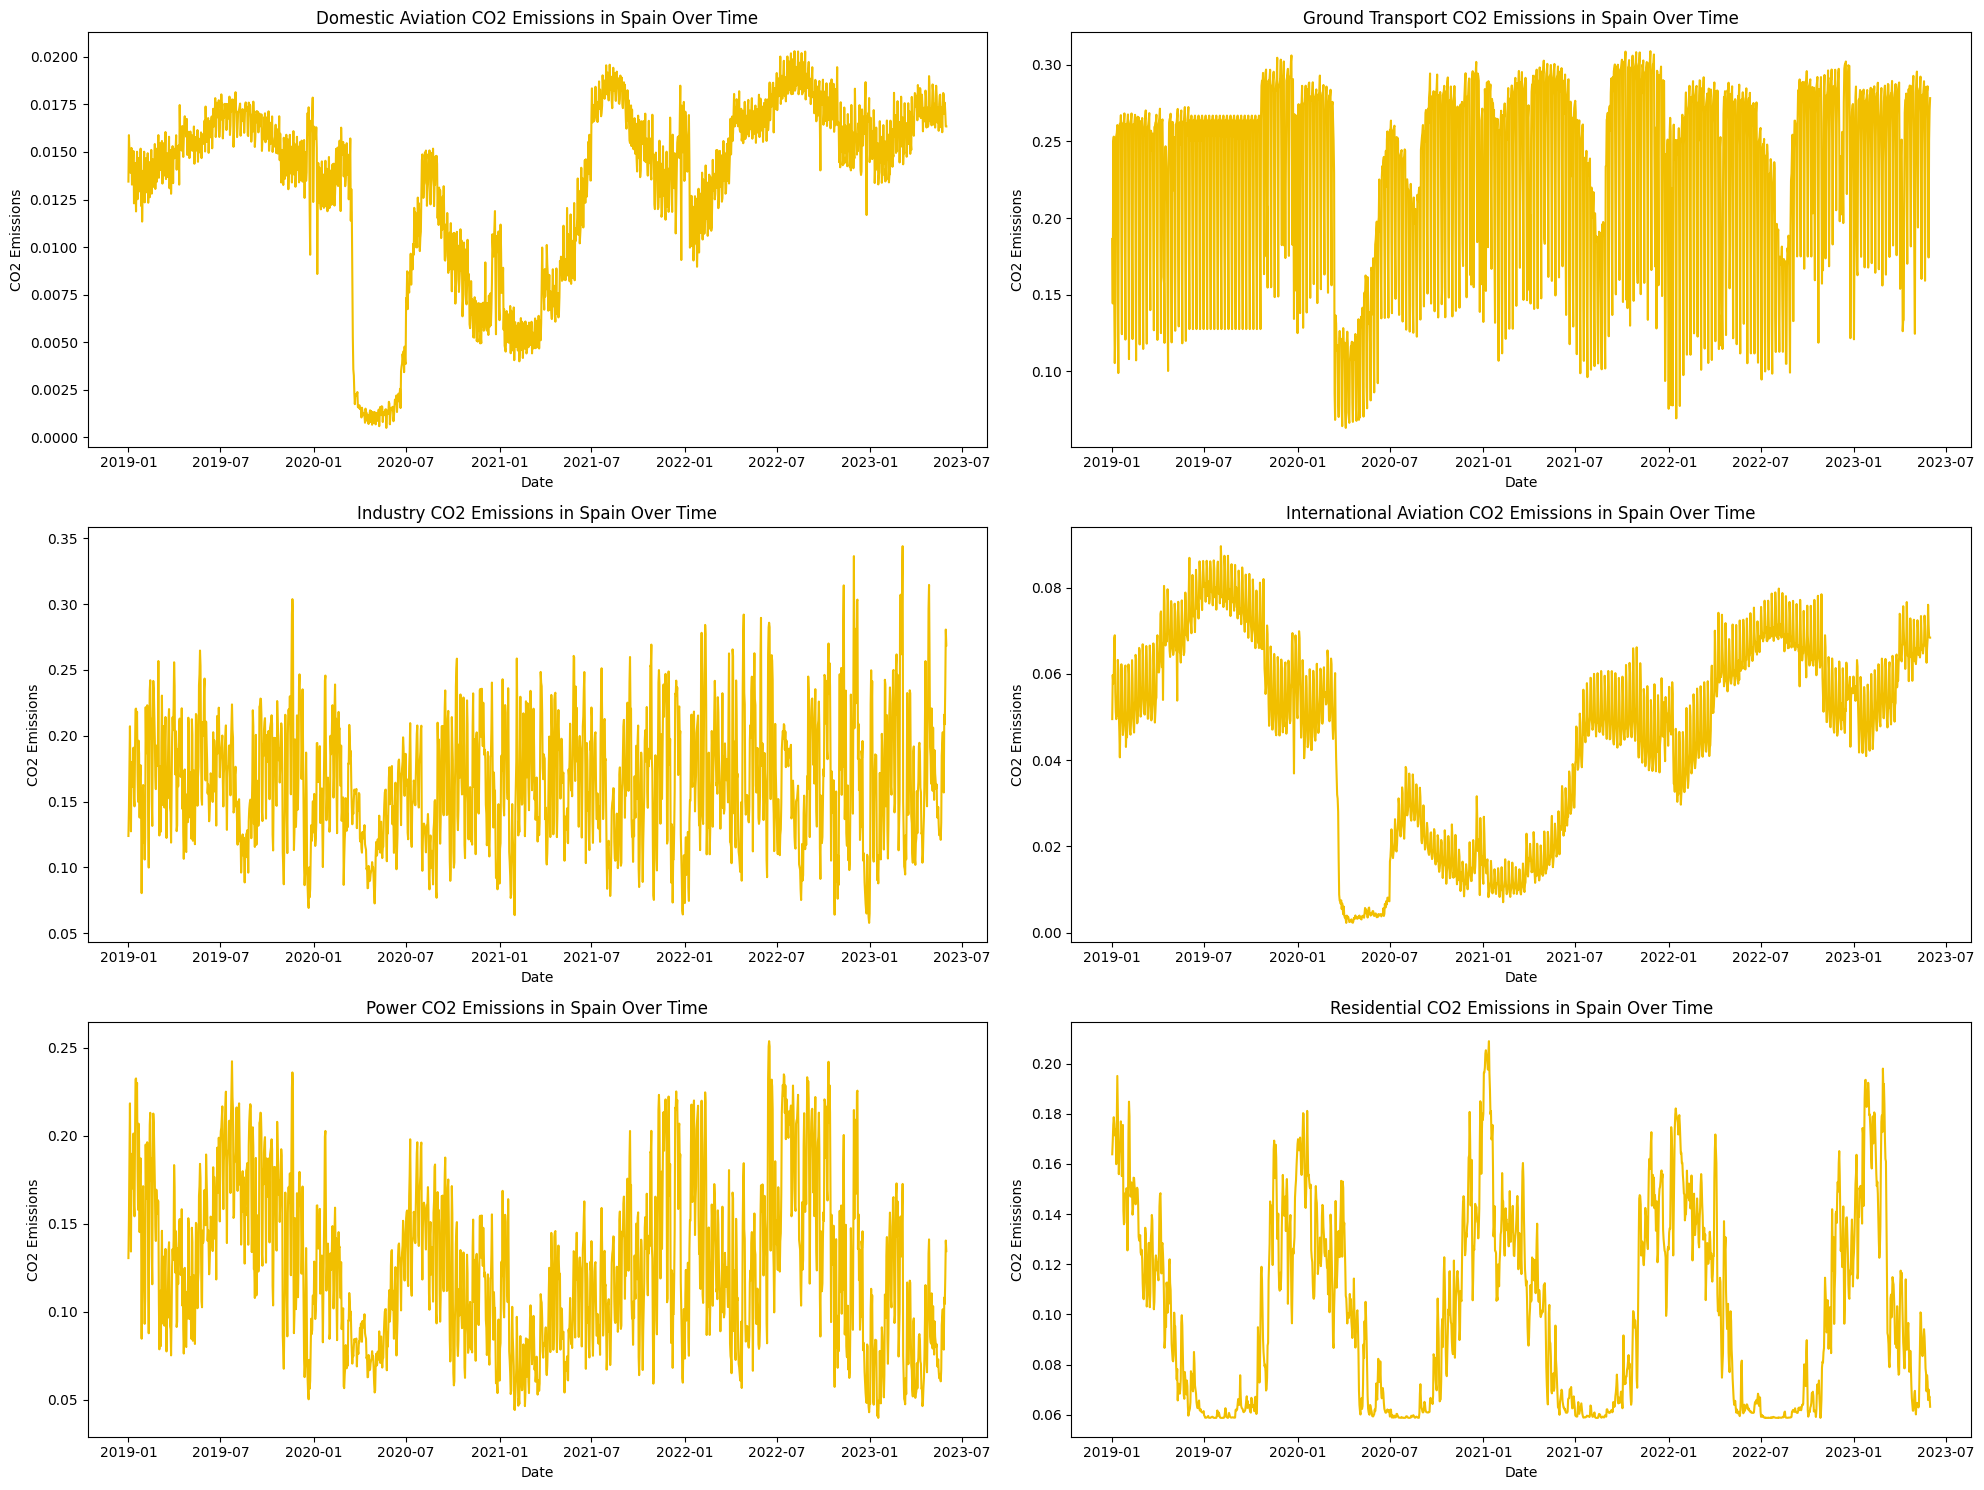

In [31]:
plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'Spain'], x='date',y='Domestic Aviation',color='#F1BF00')
plt.title('Domestic Aviation CO2 Emissions in Spain Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,2)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'Spain'], x='date',y='Ground Transport',color='#F1BF00')
plt.title('Ground Transport CO2 Emissions in Spain Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,3)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'Spain'], x='date',y='Industry',color='#F1BF00')
plt.title('Industry CO2 Emissions in Spain Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,4)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'Spain'], x='date',y='International Aviation',color='#F1BF00')
plt.title('International Aviation CO2 Emissions in Spain Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,5)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'Spain'], x='date',y='Power',color='#F1BF00')
plt.title('Power CO2 Emissions in Spain Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,6)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'Spain'], x='date',y='Residential',color='#F1BF00')
plt.title('Residential CO2 Emissions in Spain Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')


plt.tight_layout()
plt.show()

#### Visualize CO2 Emissions in Different Sectors for United Kingdom Over Time

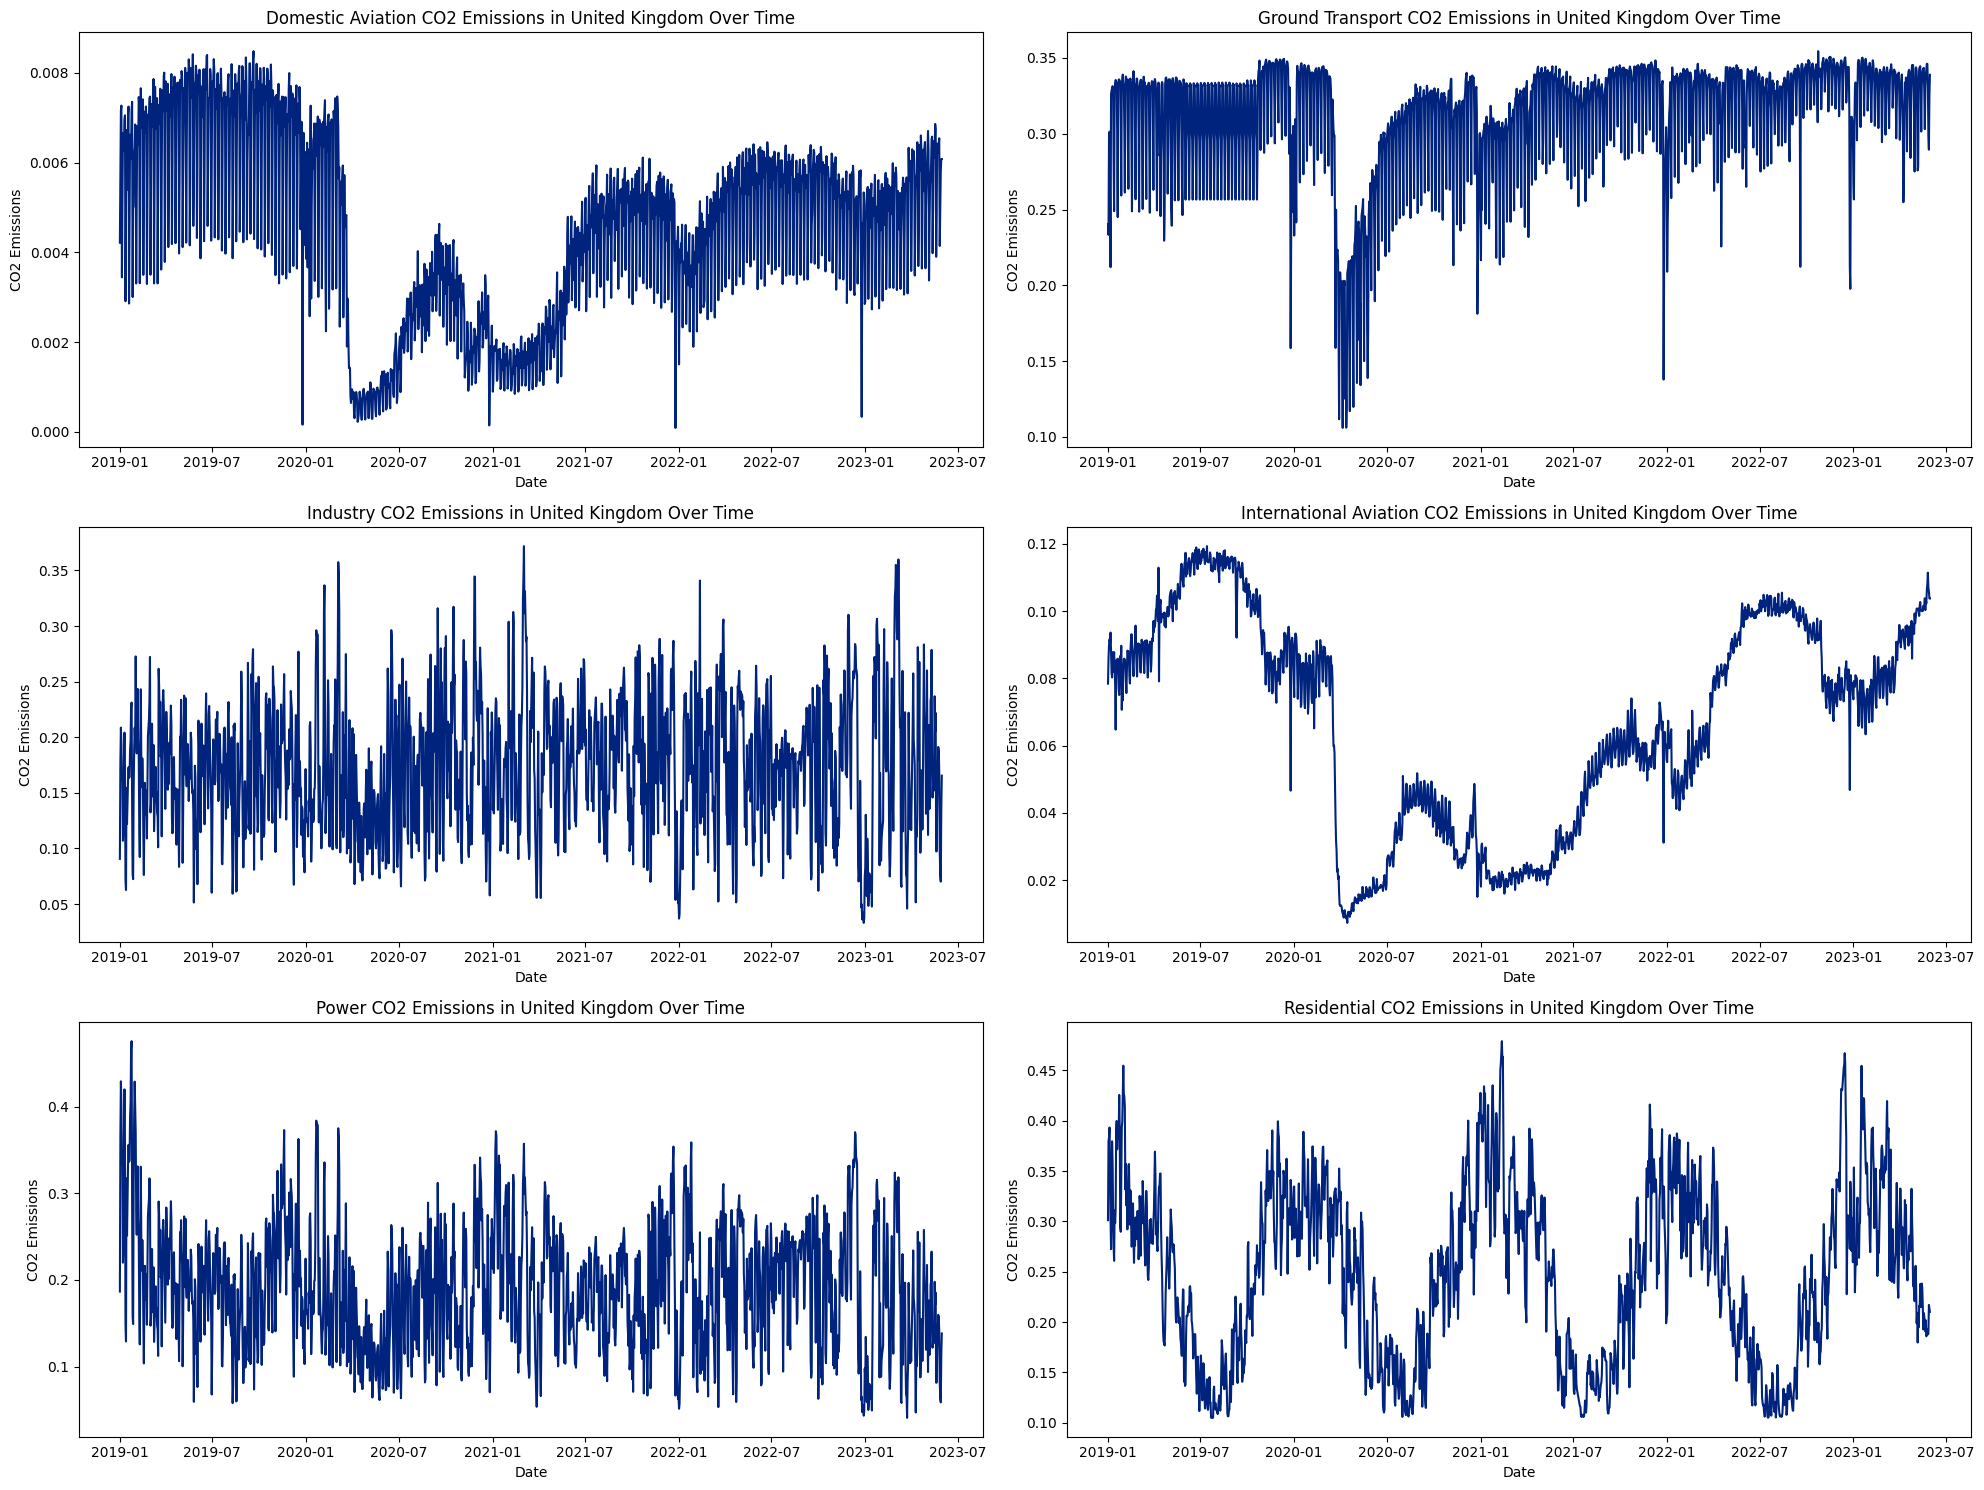

In [32]:
plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'UK'], x='date',y='Domestic Aviation',color='#00247D')
plt.title('Domestic Aviation CO2 Emissions in United Kingdom Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,2)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'UK'], x='date',y='Ground Transport',color='#00247D')
plt.title('Ground Transport CO2 Emissions in United Kingdom Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,3)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'UK'], x='date',y='Industry',color='#00247D')
plt.title('Industry CO2 Emissions in United Kingdom Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,4)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'UK'], x='date',y='International Aviation',color='#00247D')
plt.title('International Aviation CO2 Emissions in United Kingdom Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,5)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'UK'], x='date',y='Power',color='#00247D')
plt.title('Power CO2 Emissions in United Kingdom Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,6)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'UK'], x='date',y='Residential',color='#00247D')
plt.title('Residential CO2 Emissions in United Kingdom Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')


plt.tight_layout()
plt.show()

#### Visualize CO2 Emissions in Different Sectors for United States of America Over Time

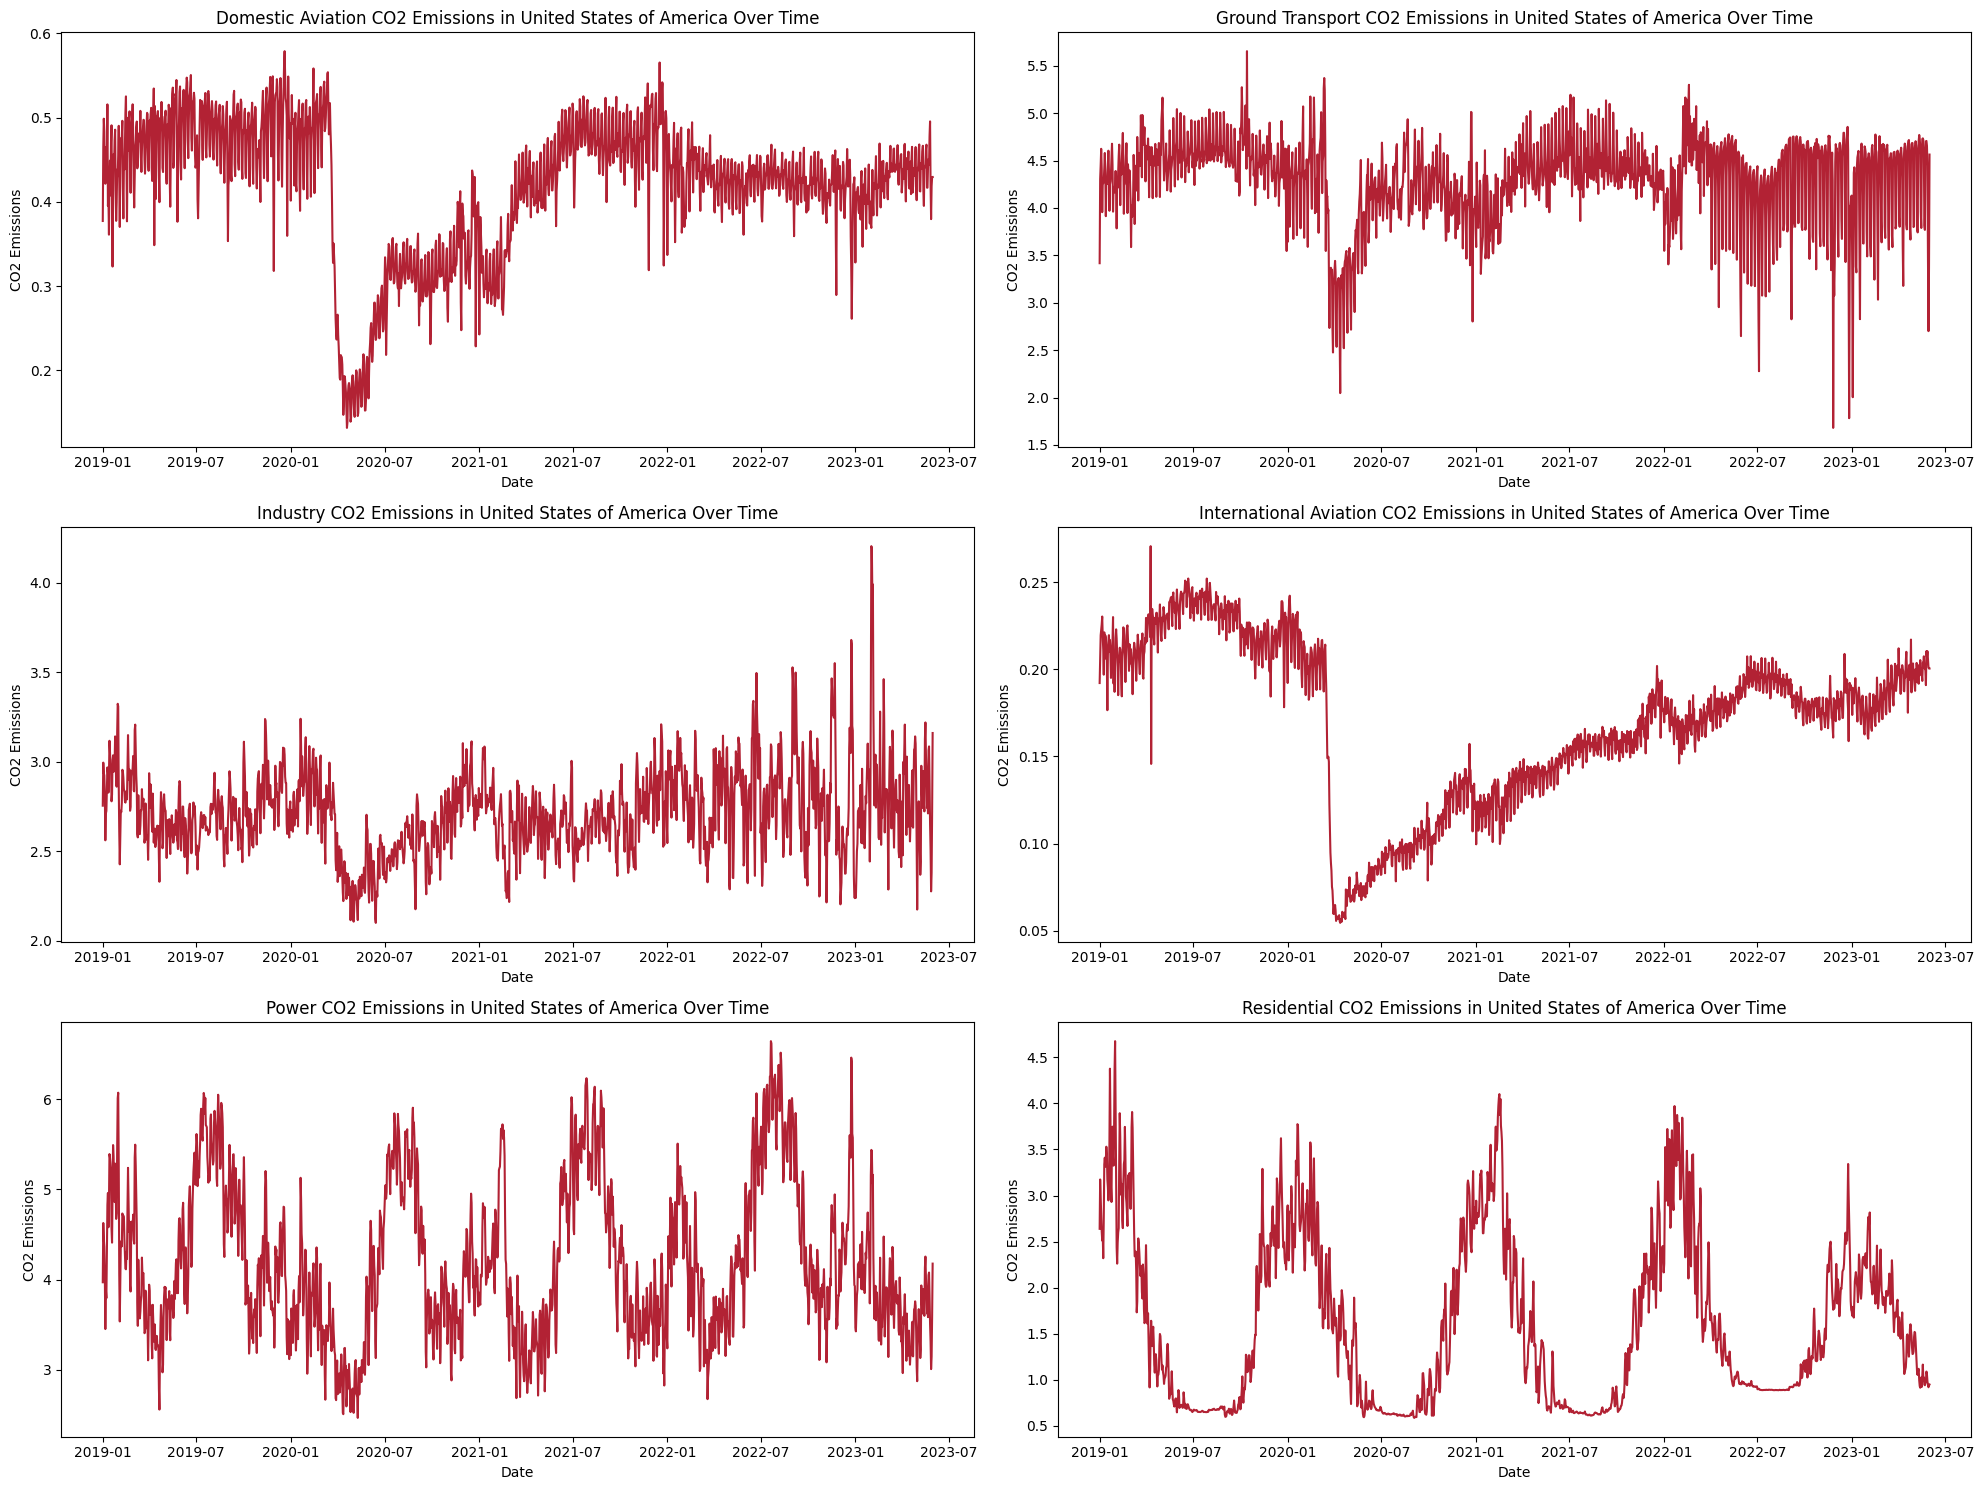

In [33]:
plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'US'], x='date',y='Domestic Aviation',color='#B22234')
plt.title('Domestic Aviation CO2 Emissions in United States of America Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,2)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'US'], x='date',y='Ground Transport',color='#B22234')
plt.title('Ground Transport CO2 Emissions in United States of America Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,3)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'US'], x='date',y='Industry',color='#B22234')
plt.title('Industry CO2 Emissions in United States of America Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,4)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'US'], x='date',y='International Aviation',color='#B22234')
plt.title('International Aviation CO2 Emissions in United States of America Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,5)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'US'], x='date',y='Power',color='#B22234')
plt.title('Power CO2 Emissions in United States of America Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')

plt.subplot(3,2,6)
sns.lineplot(data=pivot_df[pivot_df['country'] == 'US'], x='date',y='Residential',color='#B22234')
plt.title('Residential CO2 Emissions in United States of America Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')


plt.tight_layout()
plt.show()

<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Data Preprocessing</h2>
</div>

#### Encoding Country

In [34]:
# Encode 'country' column using LabelEncoder
le_country = LabelEncoder()
pivot_df["country_enc"] = le_country.fit_transform(pivot_df["country"])

#### Splitting Data Into Train , Validation , Test

In [20]:
# Split the data into training, validation, and test sets (70% train, 15% val, 15% test) for each country

train_list, val_list, test_list = [], [], []
for country in pivot_df["country"].unique():
    temp = pivot_df[pivot_df["country"] == country].sort_values("date")
    n = len(temp)
    train_end = int(n * 0.7)
    val_end = int(n * 0.85)

    train_list.append(temp.iloc[:train_end])
    val_list.append(temp.iloc[train_end:val_end])
    test_list.append(temp.iloc[val_end:])

train_df = pd.concat(train_list)
val_df   = pd.concat(val_list)
test_df  = pd.concat(test_list)

In [21]:
# Show Sample of Train DataFram 
train_df.sample(5)

sector country        date  Domestic Aviation  Ground Transport  Industry  \
20373       US  2021-10-26           0.474094          4.440060  2.485220   
12146    Japan  2021-05-12           0.014305          0.472318  0.717663   
5820    France  2021-09-11           0.005827          0.326328  0.155519   
11803    Japan  2020-06-03           0.007033          0.457121  0.625286   
12183    Japan  2021-06-18           0.016272          0.484191  0.809394   

sector  International Aviation     Power  Residential  country_enc  
20373                 0.153269  3.408140     1.296860           12  
12146                 0.024116  1.167300     0.174849            7  
5820                  0.044053  0.053328     0.103079            3  
11803                 0.016071  1.262730     0.120946            7  
12183                 0.024186  1.290260     0.122096            7

In [22]:
# Show the shapes of the resulting datasets
train_df.shape , val_df.shape , test_df.shape

((15792, 9), (3388, 9), (3388, 9))

#### Define Features and Target

In [23]:
# Define Features and Target
feature_cols = ['Domestic Aviation', 'Ground Transport', 'Industry', 'International Aviation', 'Power', 'Residential',  
                                           'country_enc'] # Features
sector_cols = ['Domestic Aviation', 'Ground Transport', 'Industry', 'International Aviation', 'Power', 'Residential'] # Target Sectors

#### Scale The Features

In [24]:
# Scale features and target
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

train_X = x_scaler.fit_transform(train_df[feature_cols])
val_X   = x_scaler.transform(val_df[feature_cols])
test_X  = x_scaler.transform(test_df[feature_cols])

train_y = y_scaler.fit_transform(train_df[sector_cols])
val_y   = y_scaler.transform(val_df[sector_cols])
test_y  = y_scaler.transform(test_df[sector_cols])

#### Create LSTM time-series windows

In [25]:
TIME_STEPS = 12  # previous days

def create_windows(X, y, time_steps=TIME_STEPS):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

X_train, y_train = create_windows(train_X, train_y)
X_val, y_val     = create_windows(val_X, val_y)
X_test, y_test   = create_windows(test_X, test_y)

In [26]:
# Show Shapes of Training Features 
print(X_train.shape , y_train.shape , X_val.shape , y_val.shape , X_test.shape , y_test.shape)

(15780, 12, 7) (15780, 6) (3376, 12, 7) (3376, 6) (3376, 12, 7) (3376, 6)


<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Modeling</h2>
</div>

In [27]:
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])), 
    Dropout(0.2), # Dropout layer to prevent overfitting 
    LSTM(64),
    Dropout(0.2),
    Dense(6, activation='relu') # Output layer with 6 units for 6 sectors
])

In [28]:
model.compile(optimizer="adam",loss="mse",metrics=["mse"])

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 12, 128)        │        69,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,430 (466.52 KB)

 Trainable params: 119,430 (466.52 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
history = model.fit(X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32
)

Epoch 1/30
494/494 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 2/30
494/494 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 7.4066e-04 - val_mse: 7.4066e-04
Epoch 3/30
494/494 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 8.6680e-04 - val_mse: 8.6680e-04
Epoch 4/30
494/494 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 9.3154e-04 - mse: 9.3154e-04 - val_loss: 8.2360e-04 - val_mse: 8.2360e-04
Epoch 5/30
494/494 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 9.8833e-04 - mse: 9.8833e-04 - val_loss: 6.2516e-04 - val_mse: 6.2516e-04
Epoch 6/30
494/494 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 8.2562e-04 - mse: 8.2562e-04 - val_loss: 5.6112e-04 - val_mse: 5.6112e-04
Epoch 7/30
494/494 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 8.1165e-04 - mse: 8.1165e-04 - val_loss: 5.3342e-04 - val_mse: 5.3342e-04
Epoch 8/30
494/494 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 7.9410e-04 - mse: 7.9410e-

In [31]:
# Predict on test set
y_pred_scaled = model.predict(X_test)

# Inverse scale predictions and true values
y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_true = y_scaler.inverse_transform(y_test)

# Calculate metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
MAE: 0.2318, MSE: 0.3954, RMSE: 0.6288, R²: 0.9889


In [32]:
model.save("lstm_model.keras")
joblib.dump(x_scaler, "scaler_X.pkl")
joblib.dump(y_scaler, "scaler_y.pkl")

['scaler_y.pkl']

In [36]:
joblib.dump(le_country, "label_encoder_country.pkl")

['label_encoder_country.pkl']

In [47]:
# For Mlflow Evaluation The Model LSTM
np.save("X_test.npy", X_test)
np.save("y_test.npy", y_test)

<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Prediction</h2>
</div>

In [33]:
model = load_model("lstm_model.keras")

In [ ]:
def predict_for_country_date(model, country, date, pivot_df, x_scaler, y_scaler, TIME_STEPS=TIME_STEPS):
    country_enc = le_country.transform([country])[0]
    
    temp = pivot_df[pivot_df["country"] == country].sort_values("date")
    temp = temp[temp["date"] < date]
    
    last_window = temp.iloc[-TIME_STEPS:].copy()
    last_window["country_enc"] = country_enc
    last_window_features = last_window[feature_cols].values
    last_window_scaled = x_scaler.transform(last_window_features)
    last_window_scaled = last_window_scaled.reshape(1, TIME_STEPS, len(feature_cols))
    pred_scaled = model.predict(last_window_scaled)
    pred = y_scaler.inverse_transform(pred_scaled)
    return pred[0] , last_window

In [45]:
pred_values , last_window = predict_for_country_date(model, "Brazil", pd.to_datetime("2023-06-01").date(), pivot_df, x_scaler, y_scaler)
print("Predicted sector values:", pred_values, "MtCO₂/day")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predicted sector values: [0.03292573 0.5790136  0.0296991  0.0122114  0.011172   0.0587508 ] MtCO₂/day


In [37]:
last_window

sector country        date  Domestic Aviation  Ground Transport  Industry  \
1600    Brazil  2023-05-20           0.030366          0.485008  0.338463   
1601    Brazil  2023-05-21           0.026485          0.405754  0.339408   
1602    Brazil  2023-05-22           0.031585          0.446685  0.348091   
1603    Brazil  2023-05-23           0.032002          0.488315  0.348375   
1604    Brazil  2023-05-24           0.032086          0.493961  0.350996   
1605    Brazil  2023-05-25           0.032305          0.495323  0.358087   
1606    Brazil  2023-05-26           0.032578          0.495616  0.359516   
1607    Brazil  2023-05-27           0.030436          0.484078  0.373083   
1608    Brazil  2023-05-28           0.026512          0.406911  0.372389   
1609    Brazil  2023-05-29           0.032057          0.452337  0.383913   
1610    Brazil  2023-05-30           0.031380          0.489869  0.385182   
1611    Brazil  2023-05-31           0.031380          0.495767  0.416003   

sector  International Aviation     Power  Residential  country_enc  
1600                  0.015600  0.084820     0.098452            0  
1601                  0.015009  0.085057     0.098452            0  
1602                  0.015507  0.087233     0.098452            0  
1603                  0.015198  0.087304     0.098452            0  
1604                  0.016086  0.087961     0.098452            0  
1605                  0.015207  0.089738     0.098452            0  
1606                  0.015397  0.090096     0.098452            0  
1607                  0.015772  0.093496     0.098452            0  
1608                  0.015472  0.093322     0.098452            0  
1609                  0.015360  0.096210     0.098452            0  
1610                  0.014782  0.096528     0.098452            0  
1611                  0.014782  0.104252     0.098452            0

In [44]:
pred_values , last_window = predict_for_country_date(model, "US", pd.to_datetime("2023-06-01").date(), pivot_df, x_scaler, y_scaler)
print("Predicted sector values:", pred_values , "MtCO₂/day")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Predicted sector values: [0.42091703 4.319998   2.9855447  0.18758939 4.1078978  0.93989336] MtCO₂/day


In [44]:
pivot_df.to_csv("pivot_df.csv", index=False)

In [39]:
last_window

sector country        date  Domestic Aviation  Ground Transport  Industry  \
20944       US  2023-05-20           0.416748           4.56816   2.74354   
20945       US  2023-05-21           0.416729           3.81414   2.78560   
20946       US  2023-05-22           0.441166           3.76849   2.71233   
20947       US  2023-05-23           0.450530           4.53988   3.06460   
20948       US  2023-05-24           0.444360           4.70298   3.08674   
20949       US  2023-05-25           0.477781           4.70628   2.89391   
20950       US  2023-05-26           0.495405           4.65648   2.65554   
20951       US  2023-05-27           0.419666           4.44763   2.50815   
20952       US  2023-05-28           0.379447           3.46250   2.27683   
20953       US  2023-05-29           0.418572           2.70071   2.38128   
20954       US  2023-05-30           0.429458           3.36832   2.72545   
20955       US  2023-05-31           0.429458           4.56272   3.16157   

sector  International Aviation    Power  Residential  country_enc  
20944                 0.207410  3.62509     1.026710           12  
20945                 0.200551  3.68067     0.947859           12  
20946                 0.200955  3.58384     0.941882           12  
20947                 0.199124  4.04931     0.966796           12  
20948                 0.190899  4.07857     0.989724           12  
20949                 0.210388  3.82378     1.090050           12  
20950                 0.206948  3.50881     1.060130           12  
20951                 0.210319  3.31406     0.981293           12  
20952                 0.205466  3.00841     0.946202           12  
20953                 0.201035  3.14642     0.919768           12  
20954                 0.200409  3.60119     0.946764           12  
20955                 0.200409  4.17744     0.949634           12